                             Sobre o conjunto de dados

Visão geral:
Este conjunto de dados inclui dados para a estimativa dos níveis de obesidade em indivíduos dos países do México, Peru e Colômbia, com base em seus hábitos alimentares e condição física.
Os dados contêm 17 atributos e 2111 registros, os registros são rotulados com a variável de classe NObesity (Nível de obesidade), que permite a classificação dos dados usando os valores de Peso insuficiente, Peso normal, Sobrepeso nível I, Sobrepeso nível II, Obesidade tipo I, Obesidade tipo II e Obesidade tipo III.

                        Detalhes da base de dadosDetalhes dos dados:

Gênero: Gênero
Idade: Idade
Altura: em metros
Peso: em kgs
family_history: Algum membro da família sofreu ou sofre de excesso de peso?
FAVC: Você come alimentos altamente calóricos com frequência?
FCVC: Você costuma comer vegetais nas suas refeições?
NCP: Quantas refeições principais você faz diariamente?
CAEC: Você come alguma coisa entre as refeições?
FUMAÇA: Você fuma?
CH2O: Quanta água você bebe diariamente?
SCC: Você monitora as calorias que ingere diariamente?
FAF: Com que frequência você pratica atividade física?
TER: Quanto tempo você usa dispositivos tecnológicos como celular, videogame, televisão, computador e outros?
CALC: Com que frequência você bebe álcool?
MTRANS: Qual meio de transporte você costuma usar?
Nível de obesidade (coluna alvo): Nível de obesidade


Import das bibliotecas necessárias para a análise

In [1]:
# Import da biblioteca que irá acessar e manipular os dados
import pandas as pd

# Import da biblioteca que irá manipular, exibir e criar gráficos
import matplotlib.pyplot as plt

# Import da bivlioteca que irá possibilitar a criação de vários
# tipos de gráficos (é baseado no matplotlib)
import seaborn as sns

# Import da biblioteca que serve para manipular e
# realizar operações com arrays

import numpy as np

# import da biblioteca que administra warnings
import warnings

warnings.filterwarnings('ignore')

Acessando a base de dados

In [2]:
base_dados = pd.read_csv('Obesity prediction.csv')

Analisando as 10 primeiras linhas

In [3]:
base_dados.head(10)

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


Para facilitar o trabalho, vamos renomear as colunas da tabela

In [4]:
base_dados.rename(columns={
    
    'Gender': 'Genero',
    'Age': 'Idade',
    'Height': 'Altura',
    'Weight': 'Peso',
    'family_history':'Historico_Familiar',
    'FAVC': 'Frequencia_em_alimentos_caloricos',
    'FCVC': 'Come_vegetais_nas_refeiçoes',
    'NCP': 'Quant_refeiçoes_principais',
    'CAEC':'Come_algo_entre_as_refeiçoes',
    'SMOKE': 'Fuma',
    'CH2O': 'Quant_agua_ingerida_diariamente',
    'SCC': 'Monitora_calorias_diariamente',
    'FAF': 'Frequencia_de_atividade_fisica',
    'TUE': 'Tempo_em_dispositivos_eletronicos',
    'CALC':'Frequencia_que_ingere_alcool',
    'MTRANS': 'Transporte_utilizado',
    'Obesity': 'Nivel_Obesidade'
    
    
}, inplace=True)

Verificando se as colunas foram alteradas

In [5]:
base_dados.columns

Index(['Genero', 'Idade', 'Altura', 'Peso', 'Historico_Familiar',
       'Frequencia_em_alimentos_caloricos', 'Come_vegetais_nas_refeiçoes',
       'Quant_refeiçoes_principais', 'Come_algo_entre_as_refeiçoes', 'Fuma',
       'Quant_agua_ingerida_diariamente', 'Monitora_calorias_diariamente',
       'Frequencia_de_atividade_fisica', 'Tempo_em_dispositivos_eletronicos',
       'Frequencia_que_ingere_alcool', 'Transporte_utilizado',
       'Nivel_Obesidade'],
      dtype='object')

Verificando o tipo de cada tabela

In [6]:
base_dados.dtypes

Genero                                object
Idade                                float64
Altura                               float64
Peso                                 float64
Historico_Familiar                    object
Frequencia_em_alimentos_caloricos     object
Come_vegetais_nas_refeiçoes          float64
Quant_refeiçoes_principais           float64
Come_algo_entre_as_refeiçoes          object
Fuma                                  object
Quant_agua_ingerida_diariamente      float64
Monitora_calorias_diariamente         object
Frequencia_de_atividade_fisica       float64
Tempo_em_dispositivos_eletronicos    float64
Frequencia_que_ingere_alcool          object
Transporte_utilizado                  object
Nivel_Obesidade                       object
dtype: object

Verificando a quantidade de valores nulos

In [7]:
base_dados.isnull().sum()

Genero                               0
Idade                                0
Altura                               0
Peso                                 0
Historico_Familiar                   0
Frequencia_em_alimentos_caloricos    0
Come_vegetais_nas_refeiçoes          0
Quant_refeiçoes_principais           0
Come_algo_entre_as_refeiçoes         0
Fuma                                 0
Quant_agua_ingerida_diariamente      0
Monitora_calorias_diariamente        0
Frequencia_de_atividade_fisica       0
Tempo_em_dispositivos_eletronicos    0
Frequencia_que_ingere_alcool         0
Transporte_utilizado                 0
Nivel_Obesidade                      0
dtype: int64

Verificando a quantidade de linhas e colunas da tabela

In [8]:
base_dados.shape

(2111, 17)

                                     ANÁLISE DESCRITIVA

Medidas de tendência central: Calcular a média, mediana e a moda para variáveis numéricas como idade, altura, peso, quantidade de refeições principais, quantidade de água ingerida diaramente e tempo em dispositivos eletrônicos

Média: média aritmética dos valores da coluna

Moda: Valor que aparece com mais frequência em um conjunto de valores

mediana: Valor que se encontra no centro de um conjunto de valores.

Visualizando novamente os nomes das colunas para facilitar a criação da solução

In [9]:
base_dados.columns

Index(['Genero', 'Idade', 'Altura', 'Peso', 'Historico_Familiar',
       'Frequencia_em_alimentos_caloricos', 'Come_vegetais_nas_refeiçoes',
       'Quant_refeiçoes_principais', 'Come_algo_entre_as_refeiçoes', 'Fuma',
       'Quant_agua_ingerida_diariamente', 'Monitora_calorias_diariamente',
       'Frequencia_de_atividade_fisica', 'Tempo_em_dispositivos_eletronicos',
       'Frequencia_que_ingere_alcool', 'Transporte_utilizado',
       'Nivel_Obesidade'],
      dtype='object')

primeiro, vamos criar uma função para facilitar o nosso processo, já que, com a
criação dela, não precisaremos repetir o processo várias vezes

In [10]:
# A função terá como objetivo mostrar no console a média, a mediana e a moda
# de cada coluna. A função ira receber como parametro o nome da coluna que 
# terá os valores impressos

# Criação da função que ira imprimir os valores
def imprimirValores(coluna):
    
    # impressão dos valores
    
    # Name: Ira mostrar o nome da coluna informada nos colchetes da base de dados
    
    # round: Serve para arredontar os valores. Basicamente, ele analisa se o primeiro
    # valor após a virgula é menor ou maior que 5, se for maior ele arredonta pra cima,
    # se for menor que 5 ele arredonta pra baixo. A função recebe 2 valores o valor e 
    # a quatidade de casas decimais que devem aparecer após a virgula.
    
    # mean: Cálcula a média dos valores
    
    # median: calcula a mediana dos valores
    
    # mode: Cálcula a moda dos valores. Ira retorna 2 valores: o indice da moda 
    # (pois pode haver mais de uma moda) e o valor da moda em si
    
    print("Média dos valores da coluna de ", base_dados[coluna].name,": ", round(base_dados[coluna].mean(), 2))
    
    print("Mediana dos valores da coluna de ", base_dados[coluna].name,": ", round(base_dados[coluna].median(), 2))
    
    print("Moda dos valores da coluna de ", base_dados[coluna].name,": ", round(base_dados[coluna].mode(), 2))

Calculando os valores da idade

In [11]:
# Chamada da função

imprimirValores('Idade')

Média dos valores da coluna de  Idade :  24.31
Mediana dos valores da coluna de  Idade :  22.78
Moda dos valores da coluna de  Idade :  0    18.0
Name: Idade, dtype: float64


Calculando os valores da altura

In [12]:
# Chamada da função

imprimirValores('Altura')

Média dos valores da coluna de  Altura :  1.7
Mediana dos valores da coluna de  Altura :  1.7
Moda dos valores da coluna de  Altura :  0    1.7
Name: Altura, dtype: float64


Calculando os valores da coluna de peso

In [13]:
# Chamada da função

imprimirValores('Peso')

Média dos valores da coluna de  Peso :  86.59
Mediana dos valores da coluna de  Peso :  83.0
Moda dos valores da coluna de  Peso :  0    80.0
Name: Peso, dtype: float64


Valores da coluna de quantidade de refeições principais

In [14]:
# chamada do método

imprimirValores('Quant_refeiçoes_principais')

Média dos valores da coluna de  Quant_refeiçoes_principais :  2.69
Mediana dos valores da coluna de  Quant_refeiçoes_principais :  3.0
Moda dos valores da coluna de  Quant_refeiçoes_principais :  0    3.0
Name: Quant_refeiçoes_principais, dtype: float64


Valores da coluna de quantidade de agua ingerida diariamente

In [15]:
# chamada da função

imprimirValores('Quant_agua_ingerida_diariamente')

Média dos valores da coluna de  Quant_agua_ingerida_diariamente :  2.01
Mediana dos valores da coluna de  Quant_agua_ingerida_diariamente :  2.0
Moda dos valores da coluna de  Quant_agua_ingerida_diariamente :  0    2.0
Name: Quant_agua_ingerida_diariamente, dtype: float64


Valores da coluna de quantidade de tempo em dispositivos eletrônicos

In [16]:
# Chamada da função

imprimirValores('Tempo_em_dispositivos_eletronicos')

Média dos valores da coluna de  Tempo_em_dispositivos_eletronicos :  0.66
Mediana dos valores da coluna de  Tempo_em_dispositivos_eletronicos :  0.63
Moda dos valores da coluna de  Tempo_em_dispositivos_eletronicos :  0    0.0
Name: Tempo_em_dispositivos_eletronicos, dtype: float64


Medidas de dispersão: Calcular o desvio padrão e variância para as mesmas
variáveis

Desvio padrão: distância que os valores estão da média 

Variância:  A variância nos mostra a dispersão dos dados em relação à média, mas ela é expressa em unidades ao quadrado. Isso significa que, se os dados originais forem em metros, a variância estará em metros quadrados. Essa unidade pode dificultar a interpretação direta.

Vamos seguir a mesma pratica de anteriormente, vamos criar uma função
para realizar a mesma tarefa quantas vezes for necessária

In [17]:
base_dados.columns

Index(['Genero', 'Idade', 'Altura', 'Peso', 'Historico_Familiar',
       'Frequencia_em_alimentos_caloricos', 'Come_vegetais_nas_refeiçoes',
       'Quant_refeiçoes_principais', 'Come_algo_entre_as_refeiçoes', 'Fuma',
       'Quant_agua_ingerida_diariamente', 'Monitora_calorias_diariamente',
       'Frequencia_de_atividade_fisica', 'Tempo_em_dispositivos_eletronicos',
       'Frequencia_que_ingere_alcool', 'Transporte_utilizado',
       'Nivel_Obesidade'],
      dtype='object')

In [18]:
# Função que irá calcular a variância e o desvio padrão 
# das colunas numéricas
def calc_desvio_variancia(coluna):
    
    # Variável que irá conter a função std da biblioteca numpy 
    # que tem como objetivo calcular o desvio padrão de uma
    # coluna numérica
    desvio_padrao = np.std(base_dados[coluna])
    
    # Variável que irá conter a função var da biblioteca numpy
    # que tem como objetivo calcular a variância de uma coluna
    # numérica.
    variancia = np.var(base_dados[coluna])
    
    # Impressão dos resultados com o round que ira limitar a aparição de casas após a virgula, 
    # no nosso caso queremos apenas 2 casas após a virgula.
    # O name ira capturar apenas o nome da coluna
    print('Desvio padrão da coluna de ', base_dados[coluna].name,": ", round(desvio_padrao, 2))
    print('Variância da coluna de ', base_dados[coluna].name,": ", round(variancia, 2))
    
    

Desvio padrão e variância da coluna de idade

In [19]:
calc_desvio_variancia('Idade')

Desvio padrão da coluna de  Idade :  6.34
Variância da coluna de  Idade :  40.25


Desvio padrão e variância da coluna de altura

In [20]:
calc_desvio_variancia('Altura')

Desvio padrão da coluna de  Altura :  0.09
Variância da coluna de  Altura :  0.01


Desvio padrão e variância da coluna de peso

In [21]:
calc_desvio_variancia('Peso')

Desvio padrão da coluna de  Peso :  26.18
Variância da coluna de  Peso :  685.65


Desvio padrão e variância da coluna de quantidade de refeições principais

In [22]:
calc_desvio_variancia('Quant_refeiçoes_principais')

Desvio padrão da coluna de  Quant_refeiçoes_principais :  0.78
Variância da coluna de  Quant_refeiçoes_principais :  0.61


Desvio padrão e variância da coluna de quantidade de agua ingerida diariamente

In [23]:
calc_desvio_variancia('Quant_agua_ingerida_diariamente')

Desvio padrão da coluna de  Quant_agua_ingerida_diariamente :  0.61
Variância da coluna de  Quant_agua_ingerida_diariamente :  0.38


Variância e desvio padrão da coluna de tempo em dispositivos eletrônicos

In [24]:
calc_desvio_variancia('Tempo_em_dispositivos_eletronicos')

Desvio padrão da coluna de  Tempo_em_dispositivos_eletronicos :  0.61
Variância da coluna de  Tempo_em_dispositivos_eletronicos :  0.37


Frequências: Contar a frequência de cada categoria para variáveis categóricas
como gênero, histórico familiar, se a pessoa fuma ou não e o transporte utilizado.

Definição: A frequência representa a quantidade de vezes que os valores únicos de uma coluna
aparecem, por exemplo, podemos calcular quantas vezes o valor categórico "sim" aparece em uma 
tabela.
Ela pode ser dividida em:

frequencia absoluta: Quantidade de vezes que o valor aparece.

frequência relativa: Porcentagem das vezes que o valor aparece.

Criação da função que irá calcular a frequência de cada valor nas colunas categóricas

In [25]:
# Função que ira calcular a frequência dos valores.
# A função irá receber como parametro o nome da 
# coluna que queremos calcular a frequência.
def calc_frequencia(coluna_categorica):
    
    # Variável que irá conter a função value_counts que tem como objetivo
    # contar a quantidade de vezes um valor aparece na coluna. A função
    # recebe como parametro o normalize=True que tem como objetivo calcular
    # a frequência relativa (porcentagem das vezes que o valor aparece) dos
    # valores da coluna.
    calculo_frequência = base_dados[coluna_categorica].value_counts(normalize=True)
    
    # impressão dos resultados usando o round que ira limitar a aparição de casas decimais
    # após a virgula, no nosso caso iremos limitar a apenas 2 casas decimais
    print('Calculo da frequência dos valores da coluna: ', round(calculo_frequência,2))
    
    

Visualizando as colunas para facilitar a chamada da função

In [26]:
base_dados.columns

Index(['Genero', 'Idade', 'Altura', 'Peso', 'Historico_Familiar',
       'Frequencia_em_alimentos_caloricos', 'Come_vegetais_nas_refeiçoes',
       'Quant_refeiçoes_principais', 'Come_algo_entre_as_refeiçoes', 'Fuma',
       'Quant_agua_ingerida_diariamente', 'Monitora_calorias_diariamente',
       'Frequencia_de_atividade_fisica', 'Tempo_em_dispositivos_eletronicos',
       'Frequencia_que_ingere_alcool', 'Transporte_utilizado',
       'Nivel_Obesidade'],
      dtype='object')

Frequência relativa (porcentagem) dos valores da coluna de generos

In [27]:
calc_frequencia('Genero')

Calculo da frequência dos valores da coluna:  Genero
Male      0.51
Female    0.49
Name: proportion, dtype: float64


frequência relativa (porcentagem) da coluna de históricos familiar

In [28]:
calc_frequencia('Historico_Familiar')

Calculo da frequência dos valores da coluna:  Historico_Familiar
yes    0.82
no     0.18
Name: proportion, dtype: float64


Porcentagem relativa (porcentagem) da coluna Fuma

In [29]:
calc_frequencia('Fuma')

Calculo da frequência dos valores da coluna:  Fuma
no     0.98
yes    0.02
Name: proportion, dtype: float64


Porcentagem relativa da coluna de transportes utilizados

In [30]:
calc_frequencia('Transporte_utilizado')

Calculo da frequência dos valores da coluna:  Transporte_utilizado
Public_Transportation    0.75
Automobile               0.22
Walking                  0.03
Motorbike                0.01
Bike                     0.00
Name: proportion, dtype: float64


Tabelas de Contingência: Criar tabelas cruzadas para analisar a relação entre duas variáveis categóricas, por exemplo, genêro e nivel de obesidade

Primeiro vamos filtrar apenas as colunas categóricas para facilitar a 
visualização das colunas que temos que trabalhar.

Tabelas cruzadas: Uma tabela cruzada, também conhecida como tabulação cruzada ou tabela de contingência, é uma ferramenta estatística que permite comparar os resultados de duas ou mais variáveis categóricas. Ela organiza os dados em uma tabela, cruzando as categorias de cada variável para mostrar a frequência com que ocorrem em conjunto.

In [31]:
# Vamos usar o a função select_dtypes do pandas que tem como objetivo
# filtrar as colunas por tipo de dados. A função recebe como parametro
# o include = ['tipo do dado que você quer filtrar']
colunas_categoricas = base_dados.select_dtypes(include=['object'])

Verificando as colunas categóricas

In [32]:
colunas_categoricas.columns

Index(['Genero', 'Historico_Familiar', 'Frequencia_em_alimentos_caloricos',
       'Come_algo_entre_as_refeiçoes', 'Fuma', 'Monitora_calorias_diariamente',
       'Frequencia_que_ingere_alcool', 'Transporte_utilizado',
       'Nivel_Obesidade'],
      dtype='object')

Agora, vamos criar uma função que ira construir as tabelas cruzadas entre 2 variáveis
categóricas

Observação: Irei analisar individualmente cada tabela cruzada.

In [33]:
# Função que ira criar as tabelas cruzadas. A função ira receber como parametro o nome das 2 colunas que serão utilizadas na construção da tabela 
# cruzada.

def tabela_cruzada(coluna1, coluna2):
    
    # Ira receber a função do pandas que ira construir a tabela cruzada 
    tabela = pd.crosstab(colunas_categoricas[coluna1], colunas_categoricas[coluna2])
    
    return tabela

Primeiro, vamos fazer a relação entre gênero e nivel de obesidade

Como vamos observar abaixo, para realizarmos uma análise um pouco mais detalhada teremos que pontuar a diferença percentual entre os valores,para
isso, vamos criar uma função que seguira a segunite fórmula matemática
para calculos de diferenças percentuais.

Calculo da porcentagem:

Diferença: valor maior  - valor menor

Dividindo pela base = diferença / valor menor

porcentagem = resulta da divisão pela base * 100 



Criação da função de calculos percentuais

In [34]:
# Função que ira calcular a diferença percentual. A 
# A função irá receber 2 argumentos o valor maior
# e o valor menor
def calc_diferenca_percentual(valormaior, valormenor):
    
    diferenca = valormaior - valormenor
    
    divisao_pela_base = diferenca / valormenor
    
    porcentagem = divisao_pela_base * 100
    
    # Retorno do valor que queremos descobrir
    return porcentagem
    

In [35]:
tabela_cruzada('Genero', 'Nivel_Obesidade')

Nivel_Obesidade,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
Genero,,,,,,,
Female,173,141,156,2,323,145,103
Male,99,146,195,295,1,145,187


In [36]:
# Chamada da função de cálculos de porcentagem

calc_diferenca_percentual(187, 103)

81.55339805825243

Conclusão da tabela: Analisando a tabela, percebemos que no geral os homens sofrem com o peso mais do
que as mulheres, entretanto, os casos em que as mulheres sofrem mais, o valor é muito discrepante,
sendo muito maior que os dos homens, como no caso da obesidade 3 por exemplo.

Peso insuficiente: O grupo das mulheres com peso insuficiente é 74% maior que o grupo de homens com
peso insuficiente

peso normal: O grupo de homens com peso normal é 3.54% maior que o grupo de mulheres com
peso normal

obesidade tipo 1:  O grupo de homens com obesidade tipo 1 é 25% maior que o grupo de mulheres com
obesidade tipo 1

Obesidade tipo 2:  O grupo de homens com obesidade tipo 2 é 14650% maior que o grupo de mulheres com
obesidade tipo 2.

Obesidade tipo 3:  O grupo das mulheres com obesidade tipo 3 é 32200% maior que o grupo de homens com
obesidade tipo 3

sobrepeso nivel 1: não há diferença entre os valores

sobrepeso nivel 2:  O grupo dos homens com sobrepeso nivel 2  é 81.53% maior que o grupo das mulheres com
sobrepeso nivel 2

validação entre o histórico familiar e a frequencia de calorias consumidas

In [37]:
tabela_cruzada('Historico_Familiar', 'Frequencia_em_alimentos_caloricos')

Frequencia_em_alimentos_caloricos,no,yes
Historico_Familiar,,
no,99,286
yes,146,1580


In [38]:
# Chamada da função de calculo de diferenças percentuais

calc_diferenca_percentual(1580, 286)

452.4475524475524

Conclusão da tabela: podemos observar que pessoas com histórico familiar 
consomem 452% mais alimentos calóricos que as pessoas sem histórico familiar.

Relação entre a frequência de consumo de alimentos calóricos e o 
nivel de obesidade

In [39]:
tabela_cruzada('Frequencia_em_alimentos_caloricos', 'Nivel_Obesidade')

Nivel_Obesidade,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
Frequencia_em_alimentos_caloricos,,,,,,,
no,51,79,11,7,1,22,74
yes,221,208,340,290,323,268,216


In [40]:
# Chamada da função de cálculo de diferenças percentuais

calc_diferenca_percentual(221, 51)

333.33333333333337

Conclusão da tabela: Podemos observar que pessoas com consomem calorias frequentemente possuem um
nivel bem mais alto em todas as categorias do que pessoas que não consomem calorias frequentemente



peso insuficiente: o grupo de pessoas que consomem calorias é 333% maior que o grupo de pessoas que não
consomem calorias frequentemente

peso normal: o grupo de pessoas que consomem calorias é 163% maior que o grupo de pessoas que não
consomem calorias frequentemente.

obesidade tipo 1: o grupo de pessoas que consomem calorias é 2990% maior que o grupo de pessoas que não
consomem calorias frequentemente. 

Obesidade tipo 2: o grupo de pessoas que consomem calorias é 4042% maior que o grupo de pessoas que não
consomem calorias frequentemente.

Obesidade tipo 3: o grupo de pessoas que consomem calorias é 32200% maior que o grupo de pessoas que não
consomem calorias frequentemente.

Sobrepeso nivel 1: o grupo de pessoas que consomem calorias é 1118% maior que o grupo de pessoas que não
consomem calorias frequentemente.

sobrepeso nivel 2: o grupo de pessoas que consomem calorias é 191% maior que o grupo de pessoas que não
consomem calorias frequentemente.

relação entre o transporte utilizado e o nivel de obesidade

In [41]:
# Chamada da função de construção de tabelas cruzadas
tabela_cruzada('Nivel_Obesidade', 'Transporte_utilizado')

Transporte_utilizado,Automobile,Bike,Motorbike,Public_Transportation,Walking
Nivel_Obesidade,,,,,
Insufficient_Weight,46,0,0,220,6
Normal_Weight,45,4,6,200,32
Obesity_Type_I,110,0,3,236,2
Obesity_Type_II,95,1,0,200,1
Obesity_Type_III,1,0,0,323,0
Overweight_Level_I,66,2,1,212,9
Overweight_Level_II,94,0,1,189,6


In [42]:
# Chamada da função de calculo de diferenças percentuais

calc_diferenca_percentual(323, 200)

61.5

Conclusão da tabela: De modo geral, podemos observar que, boa parte
das categorias de peso possuem uma grande quantidade de pessoas que
andam de transporte público e veiculos automotivos, o que pode indicar
que a falta de exercicios fisicos (no caso uma caminhada até o destino)
pode cooperar com os problemas de obesidade.Tanto que o numero com obesidade
tipo 3 e que usam transporte público é 61.5% maior que o numero de pessoas
que possuem o peso normal e utilizam o transporte público. Outro fator que 
corrobora com a teoria de que a falta de caminhada auxilia nos problemas de
obesidade, é o fato de que as pessoas do grupo que caminham (walking) possuem
um peso normal, já que nas outras categorias esse grupo é extremamente menor.

Relação entre consumo de alimentos calóricos e monitoramento da ingestão calórica

In [43]:
# Chamada da função de tabelas cruzadas

tabela_cruzada('Frequencia_em_alimentos_caloricos', 'Monitora_calorias_diariamente')

Monitora_calorias_diariamente,no,yes
Frequencia_em_alimentos_caloricos,,
no,207,38
yes,1808,58


Conclusão da tabela: Podemos concluir que a maioria das pessoas que consomem alimentos calóricos com frequência não monitora a quantidade de calorias que ingere. Essa conclusão se baseia na comparação entre os números 1808 (pessoas que consomem alimentos calóricos com frequência e não monitoram) e 58 (pessoas que consomem alimentos calóricos com frequência e monitoram).

                        Análise exploratória dos dados

                                Visualizações

Histograma: Visualizar a distribuição de variaveis numéricas como idade, peso e altura.

Primeiro vamos filtrar as colunas numéricas usando o select_dtypes

In [44]:
colunas_numericas = base_dados.select_dtypes(include=[int, float])

Visualizando as colunas numéricas

In [45]:
colunas_numericas.columns

Index(['Idade', 'Altura', 'Peso', 'Come_vegetais_nas_refeiçoes',
       'Quant_refeiçoes_principais', 'Quant_agua_ingerida_diariamente',
       'Frequencia_de_atividade_fisica', 'Tempo_em_dispositivos_eletronicos'],
      dtype='object')

Como vamos ter que criar um histograma pra cada coluna numérica vamos criar uma função de criação de histogramas

In [46]:
# Função que irá criar histogramas: A função irá receber como argumento
# a coluna que será utilizada na análise, a cor da barra e a largura
# da barra (argumento que será opcional, sendo assim, ela rrecebe como
# valor padrão o None(nenhum))
def criar_histograma(coluna, cor_da_barra, largura_da_barra = None):
    
    # Ira criar o titulo do gráfico
   plt.title(f'Histograma da coluna de {coluna}')
    
    # Ira definir o rótulo do eixo x
   plt.xlabel(f'{coluna}')
    
    # Irá definir o rótulo do eixo y
   plt.ylabel('Quantidade de pessoas')
    
    # Como o parametro width não aceita o tipo None, vamos fazer uma validação
    # que ira verificar se o argumento foi ou não passado na função. Basicamente
    # vamos verificar se o None foi substituido por um valor numérico (valor
    # da largura da barra)
   if largura_da_barra is not None:
        
        # Se o usuário passar um valor para a largura da barra, vamos passar como argumento pro 
        # plt.hist a base de dados análisada, a coluna que será utilizada na análise, a cor e a
        # largura da barra.
        plt.hist(data=colunas_numericas, x = coluna, color = cor_da_barra , width=largura_da_barra)
        
   else:
       
       # Caso o usuário não passe uma largura para a barra, vamos simplesmente
       # omitir o parametro width da função plt.hist
       plt.hist(data=colunas_numericas, x = coluna, color=cor_da_barra)
        
       
    
   # Ira exibir o gráfico no terminal
   plt.show()

Histograma das idades

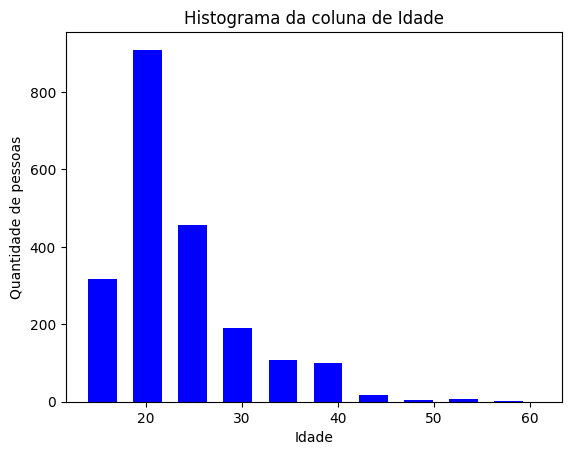

In [47]:
criar_histograma('Idade', 'blue', 3)

                                Conclusão do histograma das idades
A maioria das pessoas que fazem parte da pesquisa posuem entre 20 e 30 anos.

A minoria das pessoas das pessoas possuem mais que 50 anos e menos que 60 anos.

Podemos obeservar que a pesquisa é composta predominantemente por jovens

Histograma das alturas

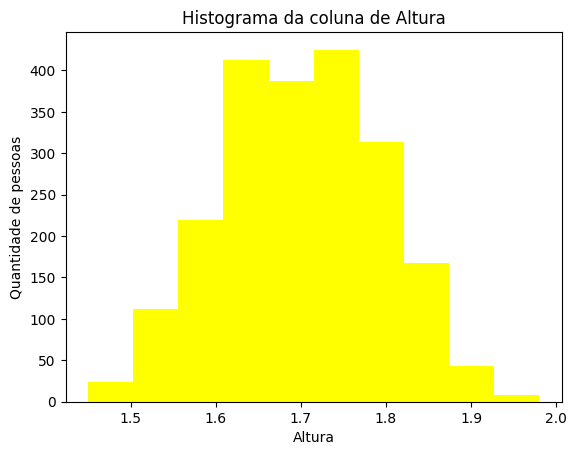

In [48]:
criar_histograma('Altura','yellow')

                                                            Conclusão dos histograma de altura
-> A maioria das pessoas estão concentradas na faixa dos 1.6 a 1.8
-> A minoria das pessoas estão concentradas na dos 1.9 a 2.0.
-> A quantidade de pessoas que possuem 1.9 de altura é maior 
que a quantidade de pessoas que possuem 1.5 de altura.
-> O grupo das pessoas na faixa dos 1.7 a 1.8 ultrapassa dos 400 
integrantes

Histograma dos pesos

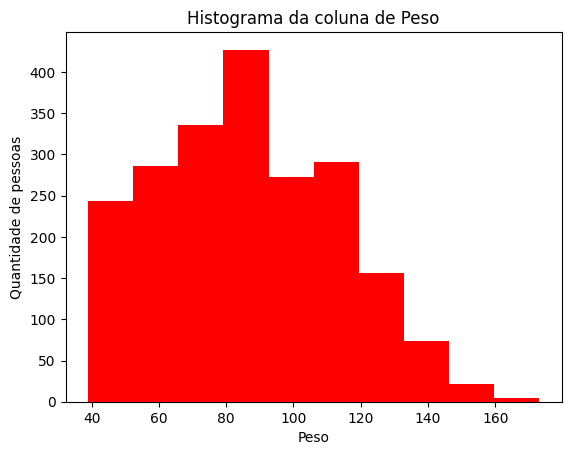

In [49]:
criar_histograma('Peso', 'red')

                                                                     Conclusão do histograma de pesos
-> Boa parte das pessoas possuem o peso na faixa dos 60 e 80 kilos

-> A minoria das pessoas possuem mais de 160 kilos

-> Podemos observar que a faixa dos 120 e 160 são menores que as demais
faixas



 Histogramas das pessoas que comem vegetais nas refeições

Como estamos lidando com quantidade de vegetais, talvez o formato de inteiros
seja o mais adequado.

In [50]:
# Conversão de float para inteiro: Primeiro vamos acessar a coluna
# de quantidade de vegetais. Depois, o astype irá converter todos os valores
# de float para int. A função irá receber conmo parametro
colunas_numericas['Come_vegetais_nas_refeiçoes'] = colunas_numericas['Come_vegetais_nas_refeiçoes'].astype(int)

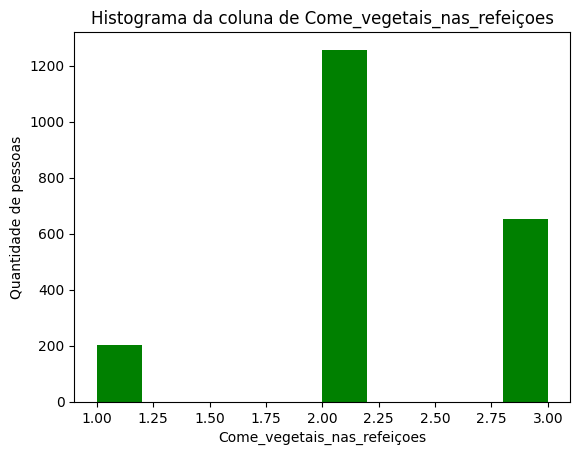

In [51]:
criar_histograma('Come_vegetais_nas_refeiçoes', 'green')

Antes de análisar a conclusão vamos verificar a quantidade de vegetais que cada pessoa
consumiu

In [52]:
colunas_numericas['Come_vegetais_nas_refeiçoes'].value_counts()

Come_vegetais_nas_refeiçoes
2    1257
3     652
1     202
Name: count, dtype: int64

Agora, vamos criar uma função para calcular a porcentagem de pessoas
que consumiram uma determinada quantidade de vegetais (no caso, a porcentagem
que consumiu vegetais 1, 2 ou 3 vezes)

In [53]:
# Função que irá calcular a porcentagem de pessoas que consomem algo
# ou realizam determinada ação. A função ira receber como parametro
# a base de dados análisada, a coluna que queremos e o valor que 
# que queremos calcular.
def calc_porcentagem_pessoas(base_dados, coluna, valor):
    
    # Ira filtrar os valores diferentes 0, pois, eles não devem
    # entrar na contagem (principalmente quando convertemos as 
    # colunas de float para inteiro)
    valores_diferentes_de_0 = base_dados[coluna] != 0
    
    # Ira receber o total de colunas diferentes de 0
    total_pessoas = valores_diferentes_de_0.sum()
    
    # Cálculo da porcentagem
    porcentagem = (valor / total_pessoas) * 100
    
    # Impressão dos resultados.
    print('Das ', total_pessoas, ' entrevistadas,', round(porcentagem,2),'%',' das pessoas consomem essa quantidade')

In [54]:
# Chamada da função
calc_porcentagem_pessoas(colunas_numericas,'Come_vegetais_nas_refeiçoes', 1257)

Das  2111  entrevistadas, 59.55 %  das pessoas consomem essa quantidade


                                                                    Conclusão do histograma de quantidade de vegetais
-> Dos 2116 entrevistados,a maioria das pessoas (59.55%) comem 2 vezes vegetais nas refeições

-> A minoria das pessoas (9.57%) comem vegetais apenas 1 vez

-> uma quantidade consideravel de pessoas (30.89%) comem vegetais 3 vezes em suas refeições

Histograma da quantidade de refeições principais

Como nesse caso também vamos falar de quantidade, precisamos converter para inteiro

In [55]:
# Vamos selecionar a coluna que queremos trabalhar e converter os valores
# para inteiro usando o astype
colunas_numericas['Quant_refeiçoes_principais'] = colunas_numericas['Quant_refeiçoes_principais'].astype(int)

Analisando a quantidade de pessoas de maneira mais exata

In [56]:
colunas_numericas['Quant_refeiçoes_principais'].value_counts()

Quant_refeiçoes_principais
3    1362
1     395
2     285
4      69
Name: count, dtype: int64

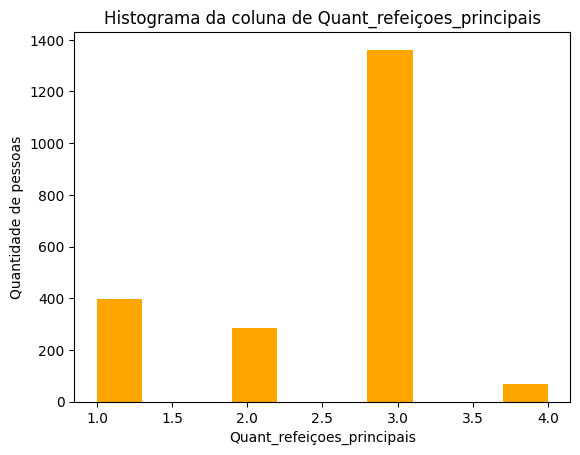

In [57]:
criar_histograma('Quant_refeiçoes_principais', 'orange')

Para aprimorar a nossa análise vamos chamar a função de cálculo de porcentagens

In [58]:
calc_porcentagem_pessoas(colunas_numericas,'Quant_refeiçoes_principais',  69)

Das  2111  entrevistadas, 3.27 %  das pessoas consomem essa quantidade


                                                               Conclusão do histograma de quantidade de refeições principais
-> A maioria dos entrevistados (64,52%) fazem 3 refeições por dia

-> Em segundo lugar, temos o grupo que faz apenas 1 refeição por dia.
Esse grupo representa 18,71% dos entrevistados.

-> No grupo das pessoas que fazem apenas 2 refeições por dia, temos
13,5% dos entrevistados

-> Já a minoria dos entrevistados (3,27%) fazem 4 refeiçoes por dia.

Histograma da quantidade de refeições principais

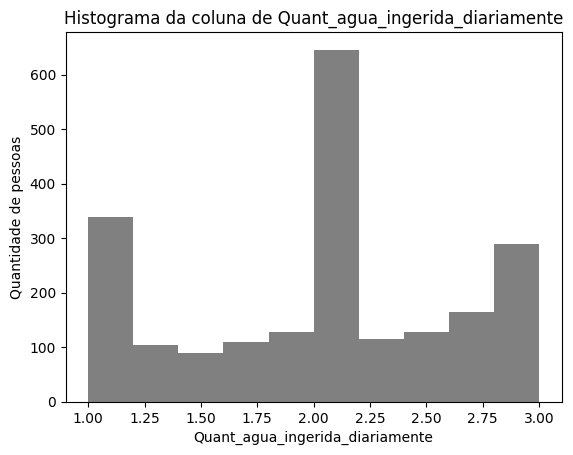

In [59]:
criar_histograma('Quant_agua_ingerida_diariamente', 'gray')

Visualizando os numeros com mais precisão: Para facilitar a nossa análise vamos verificar os valores usando o value counts com o intuito de tornar
a nossa análise mais assertiva

In [60]:
colunas_numericas['Quant_agua_ingerida_diariamente'].value_counts()

Quant_agua_ingerida_diariamente
2.000000    448
1.000000    211
3.000000    162
1.636326      3
2.825629      3
           ... 
2.722276      1
2.634342      1
2.619390      1
2.786780      1
2.863513      1
Name: count, Length: 1268, dtype: int64

Chamando a função de cálculo de percentuais de pessoas

In [61]:
calc_porcentagem_pessoas(colunas_numericas, 'Quant_agua_ingerida_diariamente', 162)

Das  2111  entrevistadas, 7.67 %  das pessoas consomem essa quantidade


                Conclusão do histograma de quantidade de água ingerida
-> A maioria dos entrevistados (21,22%) consomem 2 litros de água por dia

-> Em segundo lugar temos o grupo que ingere apenas 1 litro de água por
dia (10% das pessoas)

-> Ja á minoria das pessoas(7,67% das pessoas) consomem 3 litros de água por dia

-> Nessa análise foram consideradas os totais de pessoas de cada faixa ou seja, a quantidade total de pessoas que ingerem 1, 2 ou 3 litros de água 
por dia


Histograma das frequências de atividades fisicas

Como a frequência de atividade fisica se refere a quantidade de vezes que uma
pessoa prática exercicios fisicos ou vai á academia, precisamos converter esses valores de float para inteiros

In [62]:
# Priemeiro vamos selecionar a coluna que queremos converter e depois usarameos a função astype
# para converter todos os valores da coluna para inteiro
colunas_numericas['Frequencia_de_atividade_fisica'] = colunas_numericas['Frequencia_de_atividade_fisica'].astype(int)

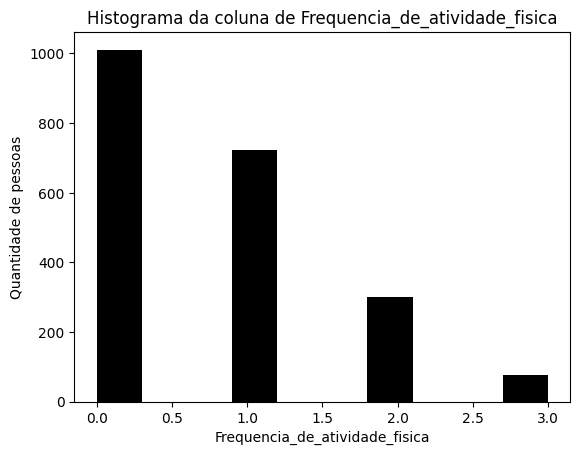

In [63]:
criar_histograma('Frequencia_de_atividade_fisica','black')

Verificando os valores com mais precisão

In [64]:
colunas_numericas['Frequencia_de_atividade_fisica'].value_counts()

Frequencia_de_atividade_fisica
0    1011
1     724
2     301
3      75
Name: count, dtype: int64

Como nesse caso temos a contagem de pessoas que não praticam exercicios fisicos, vamos calcular manualmente a porcentagem de cada categoria, pois,
a nossa função de calculos percentuais de pessoas filtra valores diferentes
de 0.

In [65]:
total_pessoas = colunas_numericas['Frequencia_de_atividade_fisica'].sum()

nao_praticam_exercicio = (1011 / total_pessoas) * 100

praticam_1_vez = (724 / total_pessoas) * 100

praticam_2_vezes = (301 / total_pessoas) * 100  

praticam_3_vezes = (75 / total_pessoas) * 100

print('Porcentagem de pessoas que não praticam exercicios: ', round(nao_praticam_exercicio,2))

print('Porcentagem de pesssoas que praticam apenas 1 vez: ', round(praticam_1_vez, 2))

print('Porcentagem de pesssoas que praticam 2 vezes: ', round(praticam_2_vezes, 2))

print('Porcentagem de pessoas que praticam 3 vezes: ', round(praticam_3_vezes, 2))

Porcentagem de pessoas que não praticam exercicios:  65.18
Porcentagem de pesssoas que praticam apenas 1 vez:  46.68
Porcentagem de pesssoas que praticam 2 vezes:  19.41
Porcentagem de pessoas que praticam 3 vezes:  4.84


                                                               Conclusão do histograma de frequências de atividades fisicas
-> 65.18%% das pessoas não praticam atividades fisicas, que no caso desse histograma,
é a maioria das pessoas.

-> Das pessoas que praticam exercicios, 46.68% (que é a maioria do grupo dos que praticam 
exercicios) fazem exercicios 1 vez por semana.

-> 19,41% das pessoas fazem exercicios 2 vezes por semana.

-> Do grupo que pratica exercicios mais vezes durante a semana, apenas 4.84% das pessoas
fazem exercicios 3 vezes por dia, que é a minoria das pessoas entrevistadas.

histograma do tempo em dispositivos eletrônicos

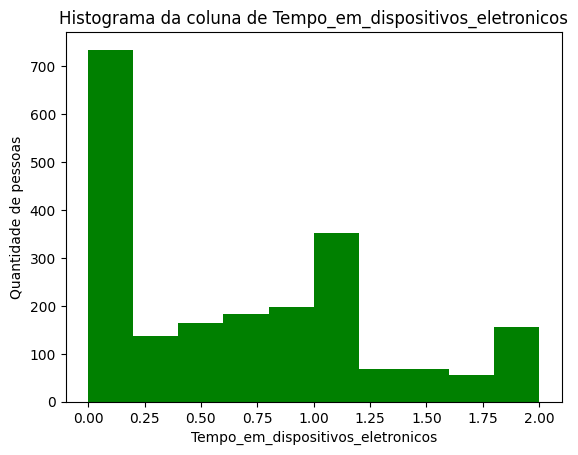

In [66]:
criar_histograma('Tempo_em_dispositivos_eletronicos','green')

Visualizando os valores com mais precisão

In [67]:
colunas_numericas['Tempo_em_dispositivos_eletronicos'].value_counts()

Tempo_em_dispositivos_eletronicos
0.000000    557
1.000000    292
2.000000    109
0.630866      4
1.119877      3
           ... 
0.091711      1
0.178301      1
0.171034      1
0.097760      1
0.813235      1
Name: count, Length: 1129, dtype: int64

Vamos novamente fazer manualmente já que nesse caso também consideramos quem também não
utiliza dispositivos eletrônicos. Nesse caso também vamos considerar na análise, apenas
o total que é formado pelas faixas de tempo que representam as categorias 0 (não utilizam
dispositivos eletronicos), 1 hora, 2 horas.

In [68]:
total_pessoas = colunas_numericas['Tempo_em_dispositivos_eletronicos'].sum()

nao_utilzam = (557 / total_pessoas) * 100

utilizam_1_hora = (292 / total_pessoas) * 100

utilizam_2_horas = (109 / total_pessoas) * 100

print('Porcentagem das pessoas que não utilizam dispositivos eletrônicos: ', round(nao_utilzam, 2))

print('Porcentagem das pessoas que utilizam dispositivos eletrônicos por 1 hora: ', round(utilizam_1_hora, 2))

print('Porcentagem das pessoas que utilzam dispositivos eletrônicos durante 2 horas: ', round(utilizam_2_horas, 2))

print('Total de entrevistados: ', round(total_pessoas, 2))

Porcentagem das pessoas que não utilizam dispositivos eletrônicos:  40.11
Porcentagem das pessoas que utilizam dispositivos eletrônicos por 1 hora:  21.03
Porcentagem das pessoas que utilzam dispositivos eletrônicos durante 2 horas:  7.85
Total de entrevistados:  1388.75


                                                       Conclusão do histograma de tempo em dispositivos eletrônicos
-> A maioria das pessoas (40,11 %) não utilizam dispositivos eletrônicos

-> Do grupo que utiliza dispositivos eletrônicos, a maioria utiliza por 
apenas 1 hora, sendo 21,03% das pessoas

-> Ja a minoria dos entrevistados utilizam dispositivos eletrônicos por 2 horas.

-> Vale lembrar que utilizamos o total de cada faixa de horário no calculo das
porcentagens

Boxplot: Identifcar outliers e comparar a distribuição de variáveis 
numéricas entre grupos (por exemplo, homens e mulheres).

A minha idéia é criar uma função que cria subplots que irá colocar 
2 boxplots um do lado do outro para verificarmos a distribuição dos
dados entre os grupos de variáveis numéricas.

In [69]:

# Função que irá criar os subplots de boxplot: A função ira receber
# como argumento o nome das colunas que serão analisadas no subplot
def criar_boxplot(coluna1, coluna2 ):
    
    # Ira definir o tamanho da imagem que ira conter os 2 boxplots
    plt.figure(figsize=(15,6))
    
    # Os nossos subplots irão ter 1 linha 2 e colunas
    
    # O primeiro subplot irá ocupar o 1° espaço (que está sendo representado
    #  pelo último valor da função)
    plt.subplot(1,2,1)
    
    # Ira definir o titulo do gráfico alinhado a esquerda e com tamanho da fonte 14
    # o name serve para capturar o nome da 1° coluna
    plt.title(f'Boxplot da coluna {colunas_numericas[coluna1].name}', fontsize=14, loc='center')

    # Ira definir o rótulo do eixo usando o nome da 1° coluna
    plt.xlabel(colunas_numericas[coluna1].name)
    
    # função que irá criar o boxplot: A função receberá como argumento
    # a base de dados analisada e a 1° coluna como valor do eixo X.
    sns.boxplot(data=colunas_numericas, x=coluna1)
    
    # O segundo subplot irá ocupar o 2° espaço da imagem
    plt.subplot(1,2, 2)
    
     # Ira definir o titulo do gráfico alinhado a esquerda e com tamanho da fonte 14
     # O name serve para capturar o nome da 2° coluna
    plt.title(f'Boxplot da coluna {colunas_numericas[coluna2].name}', fontsize=14, loc='center')
    
    # Ira definir o rótulo do eixo usando o nome da 2° coluna
    plt.xlabel(colunas_numericas[coluna2].name)
    
    # função que irá criar o boxplot: A função receberá como argumento
    # a base de dados analisada e a 2° coluna como valor do eixo X.
    sns.boxplot(data=colunas_numericas, x=coluna2)
    
    # Ira exibir os gráficos
    plt.show()
    
    
    

Boxplot de frequencia de atividades fisicas e quantidade de águas 
ingeridas

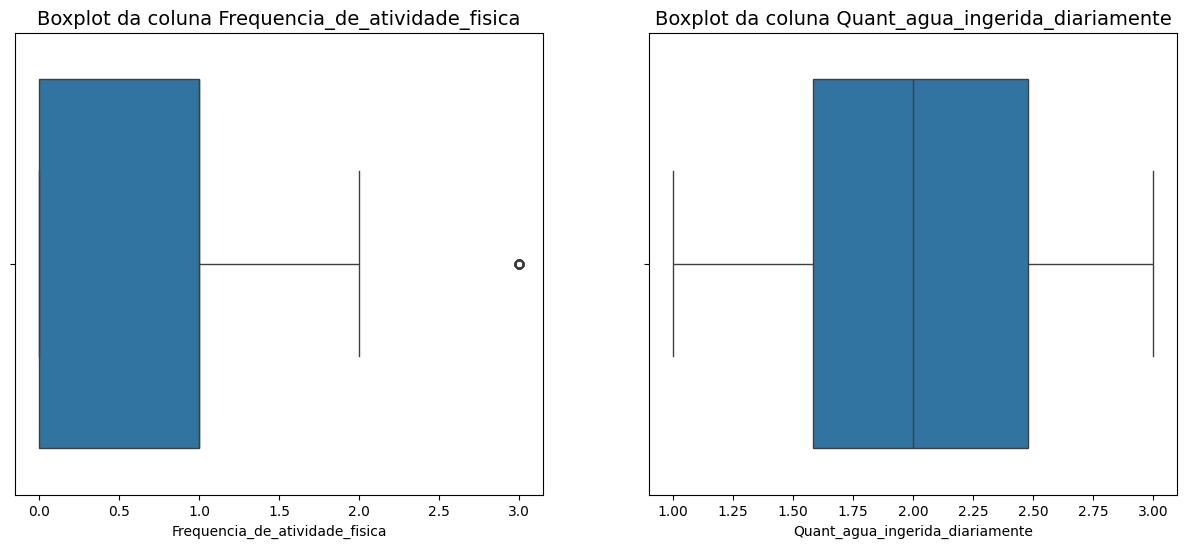

In [70]:

criar_boxplot('Frequencia_de_atividade_fisica', 'Quant_agua_ingerida_diariamente')

Como a coluna de atividades fisícas é do tipo inteiro, o boxplot teve 
dificuldades em traçar a linha da mediana, então, resolvi chamar a
função de imprimirValores para descobrir a mediana da coluna.

In [71]:
imprimirValores('Frequencia_de_atividade_fisica')

Média dos valores da coluna de  Frequencia_de_atividade_fisica :  1.01
Mediana dos valores da coluna de  Frequencia_de_atividade_fisica :  1.0
Moda dos valores da coluna de  Frequencia_de_atividade_fisica :  0    0.0
Name: Frequencia_de_atividade_fisica, dtype: float64


                            Conclusão do boxplot
-> O boxplot de atividades fisicas indica que o menor valor da coluna é 0
(pessoas que não praticam atividade fisica) e o maior valor é 2 (pessoas
que praticam exercicios fisicos 2 vezes na semana).

-> O boxplot de atividades fisicas tem o valor 1 como mediana. Há poucos 
 outliers (valor fora do padrão) no 3 (que é a minoria das pessoas,
 que como verificamos anteriormente, praticam exercicios fisicos 3
 vezes na semana ).

 -> O boxplot de quantidade de água ingerida indica que o menor valor
 da coluna é 1 (litro) e o maior valor é 3 (litros)

 -> A mediana da coluna de aguas ingeridas é de 2 litros e não
 há valores fora do pradrão, ou seja, não há outliers.

 -> A parte das distribuições está balanceada, ou seja, eles possuem
 quase os mesmos numeros de pessoas, porém, a coluna sobre a quantidade
 de águas ingeridas possui um pouco mais de pessoas. É possivel observar
 a diferença se percebemos que o primeiro boxplot vai de 0 a 1 e o segundo
 vai de 1.50 a 2.50

Boxplot do consumo de vegetais e peso

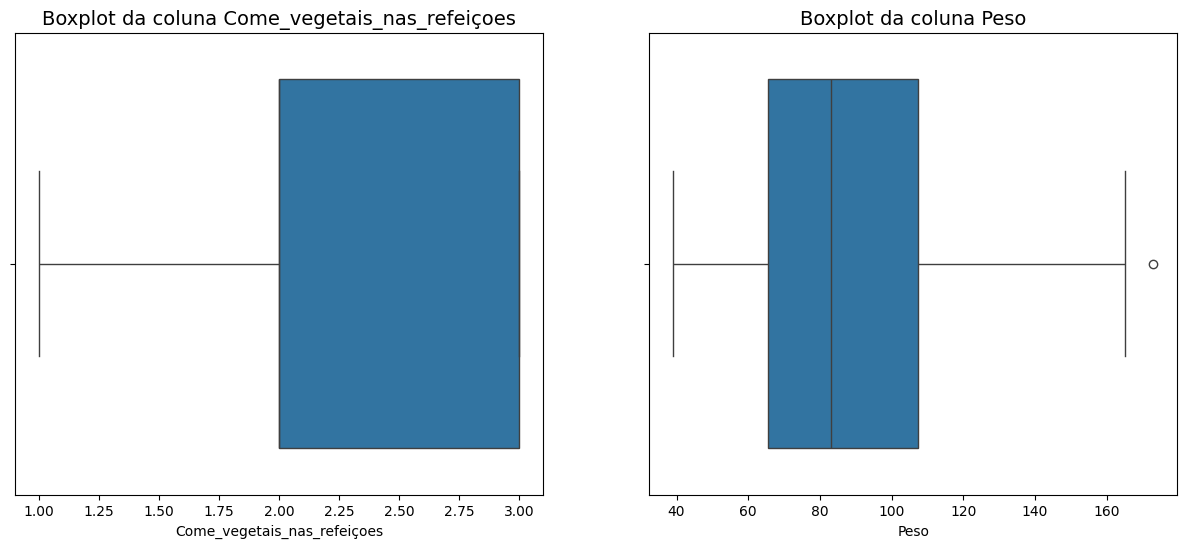

In [72]:
criar_boxplot('Come_vegetais_nas_refeiçoes', 'Peso')

Como a coluna de consumo vegetais é do tipo inteiro vamos usar a coluna de imprimir valores para 
verificar de forma exata a mediana. Como falamos anteriormente o o boxplot tem dificuldades em
traçar a linha da mediana das colunas de tipo inteiro

In [73]:
imprimirValores('Come_vegetais_nas_refeiçoes')

Média dos valores da coluna de  Come_vegetais_nas_refeiçoes :  2.42
Mediana dos valores da coluna de  Come_vegetais_nas_refeiçoes :  2.39
Moda dos valores da coluna de  Come_vegetais_nas_refeiçoes :  0    3.0
Name: Come_vegetais_nas_refeiçoes, dtype: float64


Como a linha da mediana do boxplot de peso está um pouco ácima do 80, também vamos usar
a função imprimirValores para ver o valor de forma exata

In [74]:
imprimirValores('Peso')

Média dos valores da coluna de  Peso :  86.59
Mediana dos valores da coluna de  Peso :  83.0
Moda dos valores da coluna de  Peso :  0    80.0
Name: Peso, dtype: float64


          Conclusão do boxplot
-> o boxplot de quantidade de vegetais indica que o maior valor de vegetais
consumidom é o 3 e o menor valor é o 1. A mediana da coluna de vegetais é 2.39.

-> Não há outliers na coluna de quantidade de vegetais, o que indica que os 
valores estão bem distribuidos nessa coluna.

-> O menor valor da coluna de peso é 40 e o maior valor é o 160. O valor
da mediana, ou seja, o valor que divide os em 50% é o 83.

-> Podemos observar que há pequenos outliers que se encontram acima do maior
valor, 0 160 (que representam uma minoria de pessoas que possuem peso superior a 160), entretanto, ainda podemos considerar que a coluna de peso é bem
distribuida.

-> Concluindo: se formos comaparar, ambas variaveis estão bem distribuidas,
mas, vale lembrar que a coluna de peso possui uma pequena assimetria, representada pelos outliers.

Assimetria: Se refere a falta de simetria em uma distribuição de dados.
Imagine um gráfico de barras: se ele for perfeitamente simétrico, 
significará que há mais valores concentrados em uma determinada região
do gráfico e menos em outra.

Gráficos de barras: Verificar a frequência de categorias para variáveis categóricas

Primeiro, Vamos visualizar as colunas categóricas para facilitar o nosso processo de análise

In [75]:
colunas_categoricas.columns

Index(['Genero', 'Historico_Familiar', 'Frequencia_em_alimentos_caloricos',
       'Come_algo_entre_as_refeiçoes', 'Fuma', 'Monitora_calorias_diariamente',
       'Frequencia_que_ingere_alcool', 'Transporte_utilizado',
       'Nivel_Obesidade'],
      dtype='object')

Nesse caso não irei criar uma função, pois, cada coluna terá uma quantidade diferente de
valores únicos, ou seja, cada gráfico terá as suas particularidades em sua construção

Grafico de barras da coluna de gênero

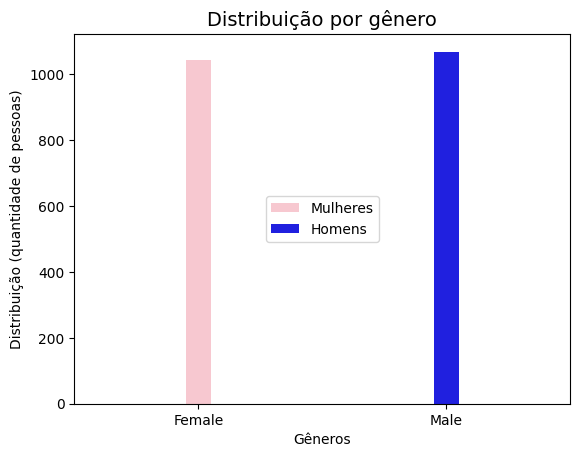

In [76]:
# Ira definir o titulo do gráfico
plt.title('Distribuição por gênero', fontsize=14, loc='center')

# Ira definir o rótulo do eixo x
plt.xlabel('Gêneros')

# Ira definir o rótulo do eixo y
plt.ylabel('Distribuição (quantidade de pessoas)')

# O countplot é uma função da biblioteca seaborn que permite visualizar
# a contagem de observações para cada categoria de uma variável categórica.
# Em outras palavras ele cria um gráfico de barras que representa a frequência de uma determinada categoria.
sns.countplot(data=colunas_categoricas, x='Genero', palette=['pink', 'blue'], width=0.1)

# Irá definir a legenda do gráfico
plt.legend(labels=['Mulheres', 'Homens'], loc='center')

# Ira exibir o gráfico 
plt.show()

Vamos usar o value_counts para visulizar os valores exatos

In [77]:
colunas_categoricas['Genero'].value_counts()

Genero
Male      1068
Female    1043
Name: count, dtype: int64

Chamando a função de calculo de porcentagens

In [78]:
calc_diferenca_percentual(1068, 1043)

2.3969319271332696

Conclusão do gráfico de distribuição de gêneros:

-> É possivel notar pelo gráfico que a distribuição está bem equilibrada

->É possivel notar que há mais homens do que mulheres, onde o grupo dos 
 homens é 2,39% maior que o grupo das mulheres.

Gráfico de barras da coluna de históricos familiar

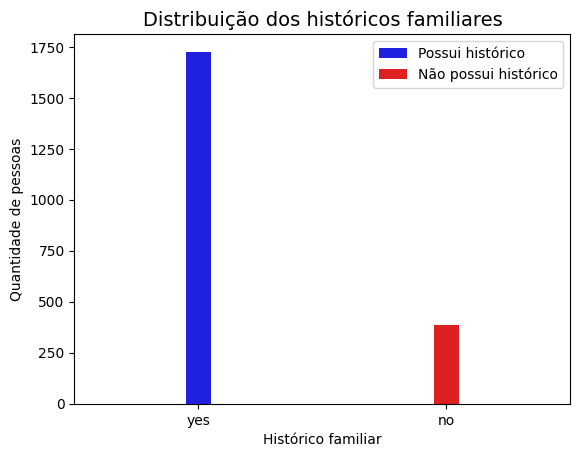

In [79]:
# Titulo do gráfico alinhado no centro e com tamanho da fonte 14
plt.title('Distribuição dos históricos familiares', fontsize=14, loc='center')

# Titulo do eixo x
plt.xlabel('Histórico familiar')

# Titulo do eixo x
plt.ylabel('Quantidade de pessoas')

# Função da biblioteca seaborn que conta a frequencia (observações de cada categoria) de uma coluna.
# A função irá receber como parâmetro a base de dados análisada, os valores do eixo x, a largura da 
# barra e a paleta de cores
sns.countplot(data=colunas_categoricas, x='Historico_Familiar' , width=0.1, palette=['blue', 'red'])

# Função que irá criar a legenda do gráfico: A função irá receber como paramêtro
# um labels que ira definir o titulo de cada categoria e um loc que irá definir
# a posição da legenda no gráfico.
plt.legend(labels=['Possui histórico', 'Não possui histórico'],loc='upper right')
plt.show()

Usando o value_counts para visualizar os valores de forma mais exata

In [80]:
colunas_categoricas['Historico_Familiar'].value_counts()

Historico_Familiar
yes    1726
no      385
Name: count, dtype: int64

Chamando a função de diferenças percentuais

In [81]:
calc_diferenca_percentual(1726, 385)

348.31168831168833

Chamada da função de calculos percentuais

In [82]:
calc_porcentagem_pessoas(colunas_categoricas, 'Historico_Familiar', 385)

Das  2111  entrevistadas, 18.24 %  das pessoas consomem essa quantidade


Conclusão do gráfico de barras dos históricos familiares:

-> É possivel notar que a quantidade de pessoas com histórico familiares de
obesidade (81,76% dos entrevistados) é muito maior do que as pessoas que não possuem um histórico de 
obesidade(18,24% dos entrevistados).

-> Podemos observar que o grupo de pessoas que possuem o historico de obesidade
´348% maior que o grupo que não possui históricos de obesidade

Gráfico de barras da frequência em alimentos calóricos

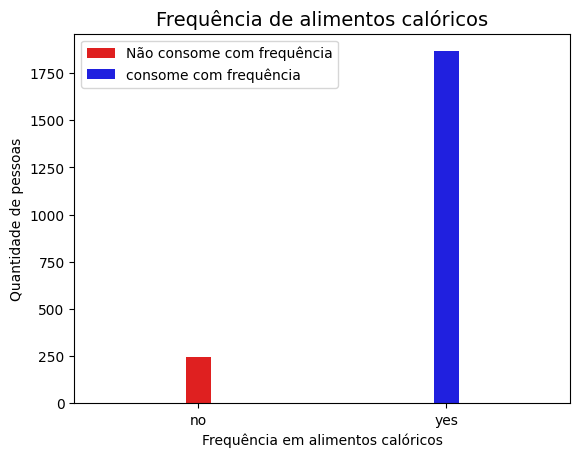

In [83]:

# Titulo do gráfico alinhado ao centro e com tamanho da fonte 14
plt.title('Frequência de alimentos calóricos', loc='center', fontsize=14)

# Titulo do eixo x
plt.xlabel('Frequência em alimentos calóricos')

# Titulo do eixo Y
plt.ylabel('Quantidade de pessoas')

# Função do seaborn que constrói um gráfico de barras com as frequências (observações) de cada categoria
# da coluna. A função ira receber como parametro a a base de dados analisada,  a largura das barras e a
# paleta de cores que será utilizada nas barras
sns.countplot(data=colunas_categoricas, x='Frequencia_em_alimentos_caloricos', width=0.1, palette=['red', 'blue'])

# Função do matplotlib que irá criar a legenda do gráfico. A função ira receber como parâmetro
# o labels com os titulos das categorias na legenda e o loc que irá definir a posição da legenda
# no gráfico.
plt.legend(labels=['Não consome com frequência', 'consome com frequência'], loc = 'upper left')

# Irá exibir o gráfico
plt.show()



Analisando os valores com mais precisão

In [84]:
colunas_categoricas['Frequencia_em_alimentos_caloricos'].value_counts()

Frequencia_em_alimentos_caloricos
yes    1866
no      245
Name: count, dtype: int64

Calculando a diferença percentual

In [85]:
calc_diferenca_percentual(1866, 245)

661.6326530612245

Chamada da função de cálculos percentuais

In [86]:
calc_porcentagem_pessoas(colunas_categoricas, 'Frequencia_em_alimentos_caloricos', 245)

Das  2111  entrevistadas, 11.61 %  das pessoas consomem essa quantidade


Conclusão do gráfico de barras de frequência de calorias:

-> Podemos observar no gráfico que a quantidade de pessoas que consomem
com frequência (88,39% dos entrevistados) é extremamente maior que o grupo que não consomem calorias
com frequência(11,61% dos entrevistados).

-> O grupo que consomem calorias com frequência é 661% maior que o grupo de pessoas que não consomem calorias frequentemente.

Gráfico de barras da coluna de pessoas que comem algo durante as refeições.

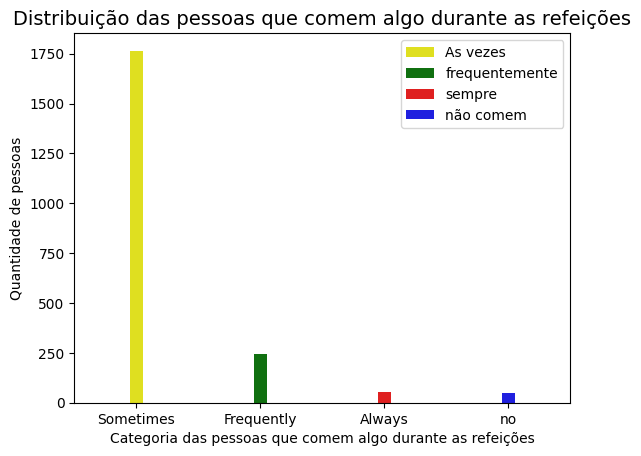

In [87]:

# Titulo do gráfico alinhado ao centro e com tamanho da fonte 14.
plt.title('Distribuição das pessoas que comem algo durante as refeições', loc='center', fontsize=14)

# Titulo do eixo x
plt.xlabel('Categoria das pessoas que comem algo durante as refeições')

# Titulo do eixo Y
plt.ylabel('Quantidade de pessoas')

# Função da biblioteca seaborn que ira criar um gráfico de barras com as frequências de cada categoria
# da coluna. A função ira receber como parametro a base de dados análisada, os valores do eixo x, a 
# largura das barras e a paleta de cores das barras do gráfico. 
sns.countplot(data=colunas_categoricas, x='Come_algo_entre_as_refeiçoes', width=0.1, palette=['yellow', 'green', 'red', 'blue'])

# Função do matplotlib que ira criar a legenda do gráfico. A função irá ter como parametro,
# o labels que ira definir o titulo das categorias na legenda e o loc que irá definir a posiçaõ
# da legenda no gráfico
plt.legend(labels=['As vezes', 'frequentemente', 'sempre', 'não comem'], loc='upper right')

plt.show()

Visualizando os dados com mais precisão

In [88]:
colunas_categoricas['Come_algo_entre_as_refeiçoes'].value_counts()

Come_algo_entre_as_refeiçoes
Sometimes     1765
Frequently     242
Always          53
no              51
Name: count, dtype: int64

Calculando a diferença percentual

In [89]:
calc_diferenca_percentual(53, 51)

3.9215686274509802

Chamada da função de cálculos percentuais

In [90]:
calc_porcentagem_pessoas(colunas_categoricas, 'Come_algo_entre_as_refeiçoes', 242)

Das  2111  entrevistadas, 11.46 %  das pessoas consomem essa quantidade


Conclusão do grafico de barras das pessoas que comem algo entre as refeições:

-> A maioria das pessoas as vezes consomem algo entre as refeições (83,16%
dos entrevistados).

-> A minoria das pessoas não consomem algo entre as refeições (2,42%
dos entrevistados)

-> O grupo de pessoas que consomem algo frequentemente é o 2° maior
grupo das categorias (11,46% dos entrevistados).

->A diferença percentual entre o grupo always (sempre consomem) e o grupo no(não consomem) é de apenas 3,9%, ou seja, é uma diferença relativamente pequena.

Grafico de barras da frequência de pessoas que fumam

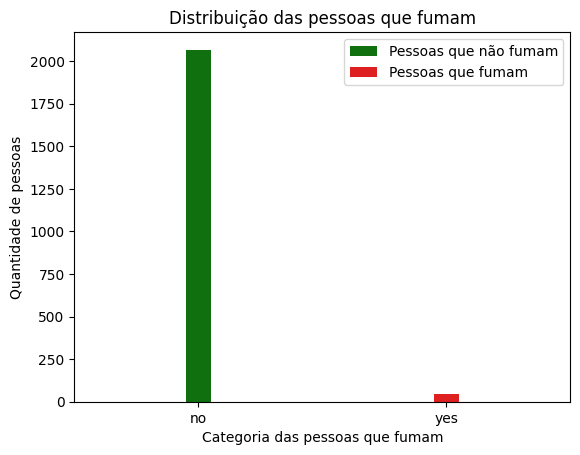

In [91]:

# Titulo do grafico alinhado ao centro e com tamanho da fonte 12
plt.title('Distribuição das pessoas que fumam', loc='center', fontsize=12)

# Titulo do eixo X
plt.xlabel('Categoria das pessoas que fumam')

# Titulo do eixo Y
plt.ylabel('Quantidade de pessoas')

# Função da biblioteca seaborn que irá construir um gráfico de barras com a frequência
# (observações) de cada categoria da coluna. A função irá receber como parametro a
# base de dados utilizada, os valores do eixo x, a largura e a paleta de cores das 
# barras do gráfico
sns.countplot(data=colunas_categoricas, x='Fuma', width=0.1, palette=['green', 'red'])

# Função do matplotlib que irá criar as legendas do gráfico. A função ira receber
# como parametro o labels (que ira definir o titulo de cada categoria na legenda)
# e o loc( que ira definir a posição da legenda no gráfico)
plt.legend(labels=['Pessoas que não fumam', 'Pessoas que fumam'], loc='upper right')

# Ira exibir o grafico
plt.show()

Visualizando os valores com mais frequência

In [92]:
colunas_categoricas['Fuma'].value_counts()

Fuma
no     2067
yes      44
Name: count, dtype: int64

Chamando a função de diferença percentual

In [93]:
calc_diferenca_percentual(2067, 44)

4597.727272727273

Chamando a função de calculo percentual de pessoas

In [94]:
calc_porcentagem_pessoas(colunas_categoricas, 'Fuma', 2067)

Das  2111  entrevistadas, 97.92 %  das pessoas consomem essa quantidade


conclusão do grafico de barras de pessoas que fumam:

-> A maioria das pessoas não fumam.

-> A minoria das pessoas fumam.

-> O grupo de não fumantes é 4597,7% maior que o grupo de fumantes

-> 2,08% das pessoas entrevistadas fumam

-> 97,92% das pessoas entrevistadas não fumam.

Grafico de barras com a frequência de pessoas que monitoram a suas calorias diariamente

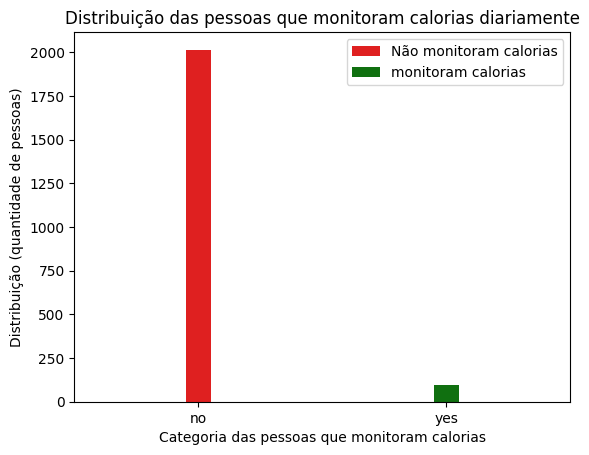

In [95]:
# Irá definir o titulo do gráfico
plt.title('Distribuição das pessoas que monitoram calorias diariamente', loc='center', fontsize=12)

# Irá definir o titulo do eixo X
plt.xlabel ('Categoria das pessoas que monitoram calorias')

# Irá definir o titulo do eixo Y.
plt.ylabel('Distribuição (quantidade de pessoas)')

# Função da biblioteca seaborn que irá criar um grafico de barras com as frequências (observações) de cada categoria
# da coluna. A função irá receber como parametro a base de dados, os valores do eixo x, a largura e a paleta de cores
# das barras do gráfico
sns.countplot(data=colunas_categoricas, x='Monitora_calorias_diariamente', width=0.1, palette=['red', 'green'])

# Função da biblioteca matplotlib que irá criar as legendas do gráfico. A função irá receber como 
# parametro o labels (que irá definir os titulos de cada categoria na legenda) e o loc(que irá
# definir a posição da legenda no gráfico)
plt.legend(labels=['Não monitoram calorias', 'monitoram calorias'], loc='upper right')

plt.show()

Visualizando os dados com mais precisão

In [96]:
colunas_categoricas['Monitora_calorias_diariamente'].value_counts()

Monitora_calorias_diariamente
no     2015
yes      96
Name: count, dtype: int64

Chamando a função de cálculos de diferenças percentuais

In [97]:
calc_diferenca_percentual(2015, 96)

1998.9583333333333

Chamando a função de calculos percentuais

In [98]:
calc_porcentagem_pessoas(colunas_categoricas, 'Monitora_calorias_diariamente', 96)

Das  2111  entrevistadas, 4.55 %  das pessoas consomem essa quantidade


Conclusão do gráfico de barras de pessoas que monitoram calorias

-> A maioria das pessoas não monitoram as suas calorias diariamente, sendo
95,45% dos entrevistados

-> A minoria dos entrevistados (4,55%) monitoram as suas calorias
diariamente.

-> O grupo de pessoas que não monitoram calorias é 1998,95% maior que 
o grupo que monitora as suas calorias diariamente.

Grafico de barras da frequência de pessoas que ingerem alcool diariamente

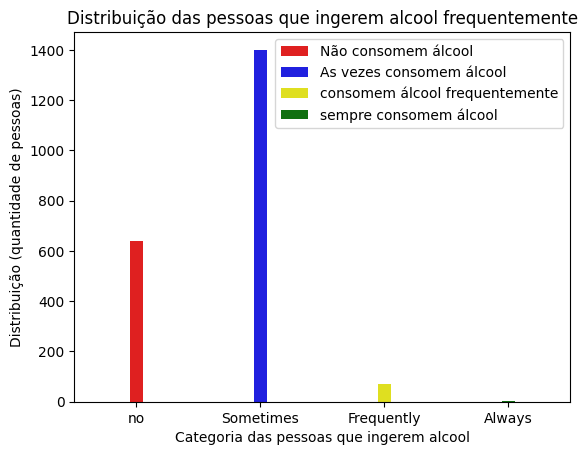

In [99]:
plt.title('Distribuição das pessoas que ingerem alcool frequentemente', loc='center', fontsize=12)

plt.xlabel('Categoria das pessoas que ingerem alcool')

plt.ylabel('Distribuição (quantidade de pessoas)')

sns.countplot(data=colunas_categoricas, x='Frequencia_que_ingere_alcool', width=0.1, palette=['red', 'blue', 'yellow', 'green'])

plt.legend(labels=['Não consomem álcool', 'As vezes consomem álcool', 'consomem álcool frequentemente', 'sempre consomem álcool'], loc='upper right')

plt.show()

Visualizando os dados com mais precisão

In [100]:
colunas_categoricas['Frequencia_que_ingere_alcool'].value_counts()

Frequencia_que_ingere_alcool
Sometimes     1401
no             639
Frequently      70
Always           1
Name: count, dtype: int64

Chamada da função de cálculos percentuais

In [101]:
calc_porcentagem_pessoas(colunas_categoricas, 'Frequencia_que_ingere_alcool', 70)

Das  2111  entrevistadas, 3.32 %  das pessoas consomem essa quantidade


Conclusão do grafico de barras da distribuição de pessoas que ingerem álcool

-> A maioria das pessoas, 66,37% dos entrevistados as vezes consomem álcool.

-> A minoria dos entrevistados, 0,05% sempre consomem bebidas álcoolicas.

-> O segundo maior grupo é o das pessoas que não consomem bebidas álcoolicas,
sendo 30,27% dos candidatos.

-> Apenas 3,32% dos entrevistados consomem álcool frequentemente.

Gráfico de barras com a frequência de transportes utilizados pelas pessoas.

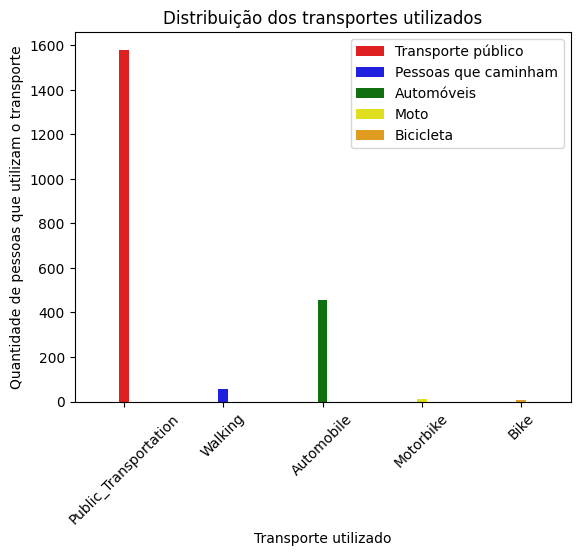

In [102]:
# Titulo do gráfico alinhado ao centro e com tamanho da fonte 12
plt.title('Distribuição dos transportes utilizados', loc='center', fontsize=12)

# Rótulo do eixo X
plt.xlabel('Transporte utilizado')

# Rótulo do eixo Y
plt.ylabel('Quantidade de pessoas que utilizam o transporte')

# Ira rotacionar os rótulos do eixo X em 45 graus para deixar
# os nomes na vertical
plt.xticks(rotation=45)

# Função da biblioteca seaborn que irá criar um gráfico de barras com as frequências (observações) de cada categoria. A função
# irá receber como parametro a base de dados análisada, a largura e a cor das barras do gráfico.
sns.countplot(data=colunas_categoricas, x='Transporte_utilizado', width=0.1, palette=['red', 'blue', 'green', 'yellow','orange'])

# Função do matplotlib que irá criar as legendas dos gráficos. A função irá receber como parâmetro o labels(que irá
# definir o titulo de cada categoria na legenda) e o loc(que irá definir a posição da legenda no gráfico).
plt.legend(labels=['Transporte público', 'Pessoas que caminham', 'Automóveis', 'Moto', 'Bicicleta'], loc='upper right')

# Exibição do gráfico
plt.show()

Visualizando os dados com mais precisão

In [103]:
colunas_categoricas['Transporte_utilizado'].value_counts()

Transporte_utilizado
Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: count, dtype: int64

Chamada da função de cálculos percentuais

In [104]:
calc_porcentagem_pessoas(colunas_categoricas,'Transporte_utilizado', 56)

Das  2111  entrevistadas, 2.65 %  das pessoas consomem essa quantidade


In [105]:
calc_diferenca_percentual(11, 7)

57.14285714285714

Chamada da função de calculo de diferenças percentuais

Conclusão do grafico de barras da frequência de transportes utilizados.

-> A maioria dos entrevistados, 74,85% utilizam o transporte público em seu dia-a-dia.

-> A minoria dos entrevistados, 0,33% utilizam a bicicleta como meio de locomoção.

-> O segundo maior grupo utilizam o automóvel como meio de locomoção. Esse grupo
representa 21,65% dos entrevistados.

->0,52% dos entrevistados utilizam moto

-> O grupo de pessoas que utilizam moto é 57,14% maior que o grupo que utiliza
bicicletas.

-> Apenas 2,65% dos entrevistados caminham em seu dia-a-dia.

Gráfico de barras da frequência de niveis de obesidade

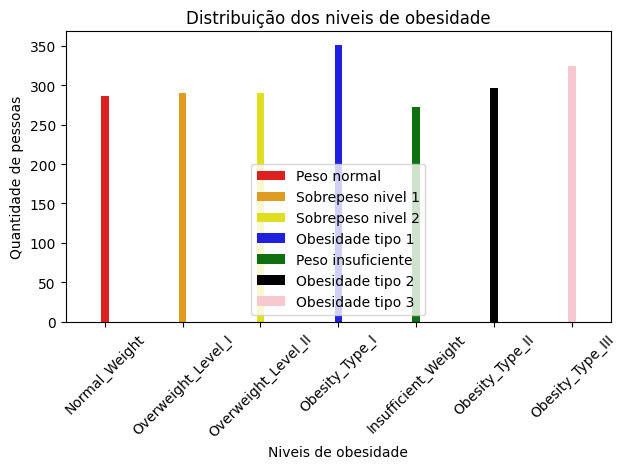

In [106]:

# Titulo do gráfico alinhado ao centro e com tamanho da fonte 12
plt.title('Distribuição dos niveis de obesidade', loc='center', fontsize=12)

# Rótulo do eixo X
plt.xlabel('Niveis de obesidade')

# Rótulos do eixo Y
plt.ylabel('Quantidade de pessoas')

# Ira deixar os rótulos do eixo x em 45 graus
# para deixa-los na vertical.
plt.xticks(rotation=45)

# Função que irá criar o gráfico de barras usando a frequência (observações) de cada categoria da coluna. A função terá
# como parametro a base de dados análisada, os valores do eixo x, a largura e a paleta de cores das barras.
sns.countplot(data=colunas_categoricas, x='Nivel_Obesidade', width=0.1, palette=['red', 'orange', 'yellow', 'blue', 'green', 'black', 'pink'])

# Função do matplotlib que irá definir a legenda do grafico. A função irá receber como parametro o labels
# (que irá definir os titulos de cada categoria) e loc (que irá definir a posição da legenda no gráfico). 
plt.legend(labels=['Peso normal', 'Sobrepeso nivel 1', 'Sobrepeso nivel 2','Obesidade tipo 1', 'Peso insuficiente',
                   'Obesidade tipo 2', 'Obesidade tipo 3'], loc='lower center')

plt.tight_layout()

plt.show()

Visualizando os dados com mais precisão

In [107]:
colunas_categoricas['Nivel_Obesidade'].value_counts()

Nivel_Obesidade
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

Chamada da função de cálculos percentuais

In [108]:
calc_porcentagem_pessoas(colunas_categoricas, 'Nivel_Obesidade', 287)

Das  2111  entrevistadas, 13.6 %  das pessoas consomem essa quantidade


Chamada da função de calculo de diferença percentual.

In [109]:
calc_diferenca_percentual(351, 272)

29.044117647058826

como 2 categorias tem a mesma quantidade de pessoas (por que as pessoas que possuem sobrepeso nivel 1 também possuem sobrepeso nivel 2), devemos considerar esse valor 2 vezes ao calcular a diferença percentual com outras categorias

In [110]:
# Irá calcular o total de pessoas que possuem sobrepeso 1 e 2
total_pessoas_com_sobrepeso = 290 +290

# Irá calcular a diferença entre o total de pessoas com sobrepeso 1 e 2 e as 
# pessoas com obesidade nivel 2
diferenca_entre_sobrepeso_e_obesidade_nivel_2 = total_pessoas_com_sobrepeso - 297

# Agora vamos pegar o valor da diferença para descobrirmos a porcentagem desse valor
# em relação ao total.
porcentagem_diferenca = (diferenca_entre_sobrepeso_e_obesidade_nivel_2 / 2111) * 100

# Impressão dos resultados
print('Diferença percentual entre sobrepeso 1 e 2 e obesidade nivel 2: ', porcentagem_diferenca)

Diferença percentual entre sobrepeso 1 e 2 e obesidade nivel 2:  13.405968735196588


Conclusão do gráfico de barras sobre nivel de obesidade:

-> A maioria dos entrevistados, 16,63%, possiem obesidade do tipo 1

-> A minoria dos entrevistados possuem peso insuficiente. Esse grupo
representa 12,88% dos entrevistados.

-> 15,35% dos entrevistados possuem obesidade do tipo 3

-> 14,07% dos entrevistados possuem obesidade do tipo 2.

-> 13,74% dos entrevistados possuem sobrepeso nivel 1 e sobrepeso nivel 2

-> 13.6% dos entrevistados possuem o peso normal.

-> O maior grupo (obesidade tipo 1) é apenas 29% maior que o menor grupo (o grupo
de pessoas que possuem pesos insuficientes).

-> A diferença entre o grupo que possuem sobrepeso nivel 1 e sobrepeso nivel 2  e o
grupo de obesidade nivel 2 também é pequeno, de apenas 13,40%

Gráfico de dispersão: Analisar a relação entre 2 variáveis numericas, como altura e peso

Criação da função que irá criar os gráficos de dispersão

In [111]:
# Função que irá criar os gráficos de dispersão: A função irá receber como parâmetro
# o nome da coluna do eixo x, o nome da coluna do eixo Y, a cor dos pontos do gráfico
# o rótulo do eixo X e o rótulo do eixo Y
def criar_dispersao(colunaX, colunaY, cor_ponto, labelx, labely):
    
    # Titulo do gráfico usando os valores do eixo X e Y. O titulo será alinhado ao centro e terá
    # como tamanho da fonte o valor 12.
    plt.title(f'Grafico de dispersão das variáveis {labelx} e {labely}', loc='center', fontsize=12)
    
    # Rótulo do eixo X
    plt.xlabel(labelx)
    
    # Rótulo do eixo Y
    plt.ylabel(labely)
    
    # Função do seaborn que irá criar o gráfico de pontos scatterplot. A função irá
    # receber como parametro a base de dados análisada, os valores do eixo X, os 
    # valores do eixo Y e a cor dos pontos do gráfico
    sns.scatterplot(data=colunas_numericas, x = colunaX, y = colunaY, color=cor_ponto)
    
    # Exibição do gráfico
    plt.show()
    
    
    
    
    


Relação entre peso e altura

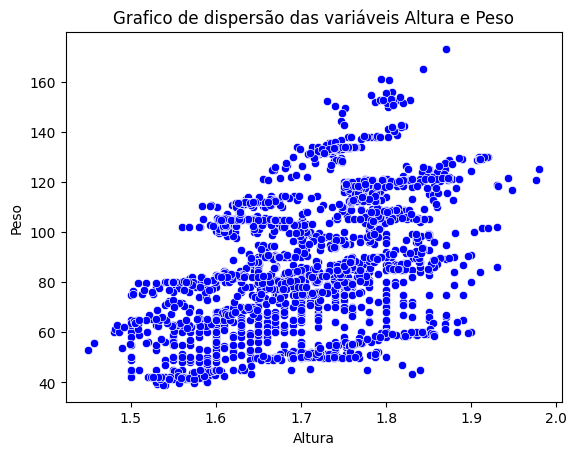

In [112]:
criar_dispersao('Altura', 'Peso', 'blue',  'Altura', 'Peso')

Relação entre o peso e a altura: Podemos observar que conforme o a altura aumenta, o 
peso também cresce, logo podemos afirmar que quanto maior for o individuo, maior é o
seu peso

->Temos aqui uma correlação positiva.

Relação entre frequência de atividade fisica e a quantidade de água ingerida diariamente

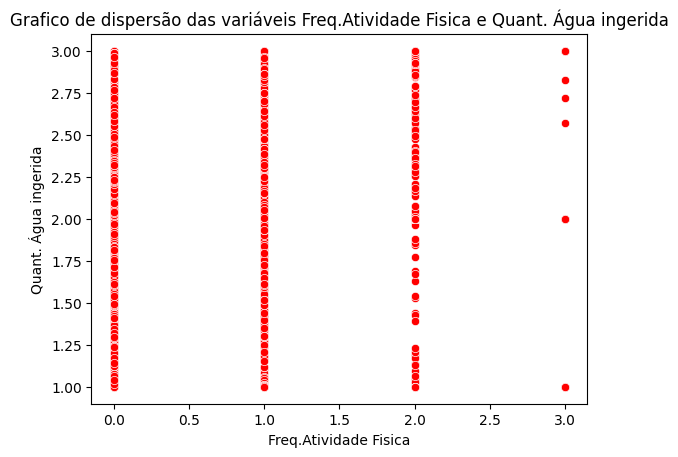

In [113]:
criar_dispersao('Frequencia_de_atividade_fisica', 'Quant_agua_ingerida_diariamente', 'red', 'Freq.Atividade Fisica', 'Quant. Água ingerida')

Conclusão do scatterplot de peso e frequência de atividade fisica: Podemos concluir que não há nenhuma correlação, 
pois, independente da frequência de atividades fisicas eles consomem quase a mesma quantidade de água, e o unico 
valor discrepante é o 3 que é a minoria em ambas categorias (descobri isso através do value_counts, mas também podemos
 observar essa fator nos gráficos anteriores). Logo como não há um padrão de aumento ou diminuição podemos concluir que 
 não há relação entre essas 2 variáveis.

Relação entre o peso e a quantidade de vegetais nas refeições.

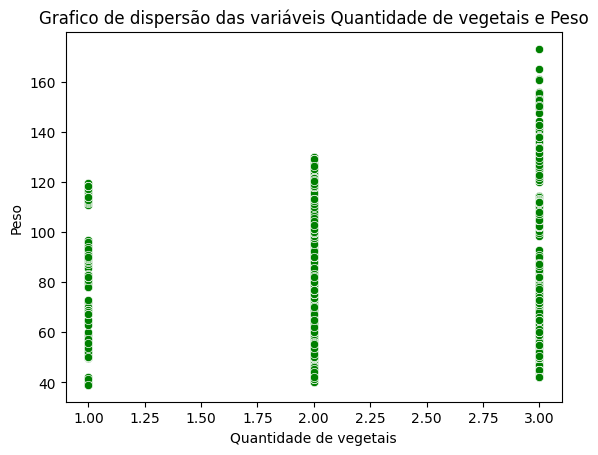

In [114]:
criar_dispersao('Come_vegetais_nas_refeiçoes', 'Peso', 'green', 'Quantidade de vegetais', 'Peso')

Conclusão do scatterplot de peso e quantidade de vegetais: Podemos observar não há nenhum padrão de crescimento ou decrescimento, logo não é possivel afirmar que há relação entre as 2 variáveis. Geralmente quando os pontos de
um scatterplot aparecem de forma vertical ("em pé"), é por que não há correlação entre as variáveis

Relação entre Frequência de atividade fisica e o tempo em dispositivo eletrônico

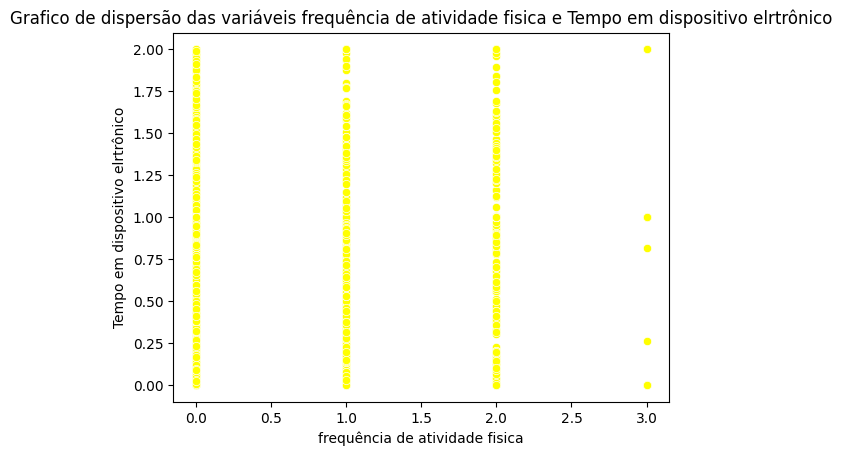

In [115]:
criar_dispersao('Frequencia_de_atividade_fisica','Tempo_em_dispositivos_eletronicos', 'yellow', 'frequência de atividade fisica', 'Tempo em dispositivo elrtrônico')

Conclusão do scatterplot entre frequência de atividade fisica e o tempo em dispositivos eletrônicos: Não há nenhuma relação
entre as 2 variáveis, a única discrepância é o das pessoas que praticam atividade fisica 3 vezes na semana, pois, esse grupo
representa a minoria dos entrevistados. 

Relação entre idade e peso

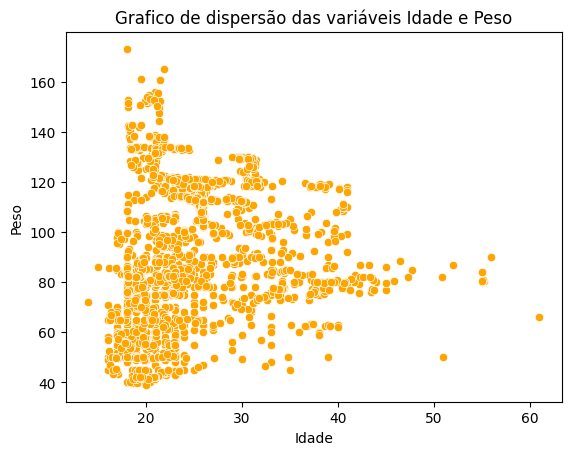

In [116]:
criar_dispersao('Idade', 'Peso','orange', 'Idade', 'Peso')

Conclusão do scatterplot da relação entre peso e idade: Podemos observar que há um tendência de diminuição de peso do entrevistado conforme ele vai ficando mais velho. Segundo o gráfico as maiores faixas de peso estão concentradas
na faixa dos 20 a 30 anos.

Relação entre peso e o tempo em dispositivos eletrônicos

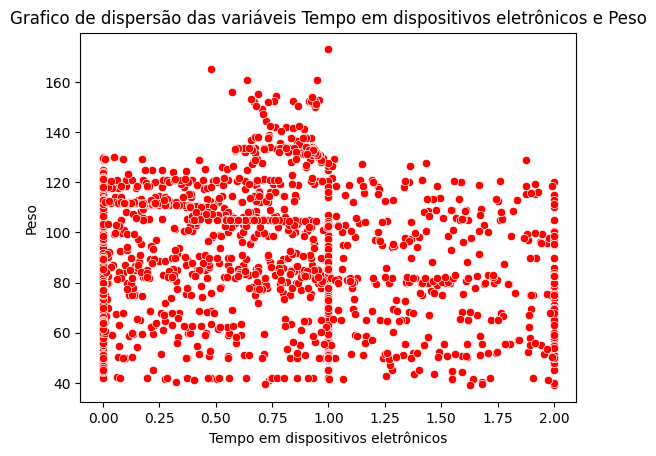

In [117]:
criar_dispersao('Tempo_em_dispositivos_eletronicos', 'Peso','red','Tempo em dispositivos eletrônicos', 'Peso' )

Conclusão do scatterplot da relação entre tempo em dispositivos eletrônicos e 
o peso: Não é possivel notar um padrão de distribuição dos dados, apenas que há pessoas com pesos altos que utilizam dispositivos eletrônicos entre 50 minutos e 1 hora

Correlação: Calcular o coeficiente de correlação de Pearson para identificar a força e direção da relação entre 2 variáveis numéricas.

correlação linear de person: é uma medida estátistica que avalia o grau de associação linear entre 2 variáveis quantitativas. Seu valor de -1 a +1, onde:

-1: Correlação linear negativa perfeita (quando uma variável aumenta, a outra diminui na mesma proporção).

0: Não há correlação linear entre as variáveis.

+1: Correlação linear positiva perfeita (quando uma variável aumenta, a outra também aumenta na mesma proporção)

Intensidade da Correlação:

A intensidade da correlação é determinada pela proximidade do valor de 'r' de -1 ou +1:

Correlação Forte:

Positiva: r próximo de +1 (ex: 0.7 a 1)

Negativa: r próximo de -1 (ex: -0.7 a -1)

Correlação Moderada:

Positiva: r entre 0.5 e 0.7

Negativa: r entre -0.5 e -0.7

Correlação Fraca:

Positiva: r entre 0 e 0.5

Negativa: r entre 0 e -0.5

Value-p: O valor-p é uma ferramenta estatística que nos ajuda a determinar a probabilidade de obter os resultados observados se a hipótese nula for verdadeira. Ele é usado para tomar decisões sobre a significância estatística dos resultados de um estudo. No entanto, é importante interpretá-lo com cautela e considerar suas limitações.

Hipótese nula no contexto da correlação de pearson: 0 (não há correlação linear entre as variáveis)

Interpretando o valor-p:

Valor-p baixo (geralmente ≤ 0,05): Se o valor-p for baixo, isso significa que é improvável obter os resultados observados se a hipótese nula for verdadeira. Nesse caso, rejeitamos a hipótese nula e concluímos que há evidências estatísticas de que o medicamento tem efeito na pressão arterial.

Valor-p alto (geralmente > 0,05): Se o valor-p for alto, isso significa que é provável obter os resultados observados mesmo se a hipótese nula for verdadeira. Nesse caso, não rejeitamos a hipótese nula e concluímos que não há evidências estatísticas suficientes para afirmar que o medicamento tem efeito na pressão arterial.

Primieiro, vamos criar uma função que irá calcular a correlação de pearson

In [118]:
# Função que irá calcular a correlação de person entre 2 colunas.
# A função irá receber como argumento 2 valores, o nome da 1°
# e o nome da °2 coluna.
def calc_correlacao_pearson(coluna1, coluna2):

     # Import do módulo scipy.stats que contem
     # a função pearsonr
     from scipy.stats import pearsonr
     
     # Variável que irá receber a função pearsonr com 2 argumentos: a coluna 1
     # e a coluna 2 da base de dados de colunas numéricas.
     correlacao = pearsonr(colunas_numericas[coluna1], colunas_numericas[coluna2])
     
     # Impressão dos resultados.
     print('Valor da correlação entre as variaveis ', coluna1, ' e ', coluna2, ': ', correlacao)

Correlação entre idade e peso

In [119]:
calc_correlacao_pearson('Idade', 'Peso')

Valor da correlação entre as variaveis  Idade  e  Peso :  PearsonRResult(statistic=np.float64(0.20256010359865875), pvalue=np.float64(5.5172747407568116e-21))


Conclusão da correlação: Podemos observar que há uma correlação linear positiva fraca, pois, há uma pequena tendência de aumento nas 2 variáveis,
já que o valor está um pouco mais próximo do 1.

Nesse caso, o value-p é alto, logo seria possivel encontrar essa correlação linear fraca em uma hipótese nula (situação as 2 colunas não teriam correlação).


Correlação entre peso e a quantidade de vegetais consumidos

In [120]:
calc_correlacao_pearson('Peso', 'Come_vegetais_nas_refeiçoes')

Valor da correlação entre as variaveis  Peso  e  Come_vegetais_nas_refeiçoes :  PearsonRResult(statistic=np.float64(0.20108724260844818), pvalue=np.float64(1.0681990875180831e-20))


Conclusão da correlação de pearson entre peso e a quantidade de vegetais consumidos: Há uma correlação linear
fraca positiva, ou seja, há uma pequena tendência das 2 variáveis crescerem juntas. O como value-p está próximo
do 0 (1.0681990875180831e-20), há propabilidade de encontrarmos essa correlação em uma hipótese nula (quando não
há correlação entre as 2 variáveis) é quase impossivel.

Correlação entre frequência de atividade fisica e tempo em dispositivos eletrônicos

In [121]:
calc_correlacao_pearson('Frequencia_de_atividade_fisica', 'Tempo_em_dispositivos_eletronicos')

Valor da correlação entre as variaveis  Frequencia_de_atividade_fisica  e  Tempo_em_dispositivos_eletronicos :  PearsonRResult(statistic=np.float64(0.04819974495044531), pvalue=np.float64(0.02679147408616808))


Conclusão da correlação entre atividade fisica e o tempo em dispositivos eletrônicos: Há uma correlação linear
fraca positiva, pois, há uma pequena tendência dos 2 valores aumentarem juntos. Como o value-p é 0 (0.02679147408616808
pra ser mais exato), é impossivel encontrarmos esse resultado em uma hipótese nula (onde as 2 variáveis não possuem
nenhum tipo de correlação).



correlação entre a quantidade de refeições principais e a frequência de atividades fisicas

In [122]:
calc_correlacao_pearson('Frequencia_de_atividade_fisica', 'Quant_refeiçoes_principais')

Valor da correlação entre as variaveis  Frequencia_de_atividade_fisica  e  Quant_refeiçoes_principais :  PearsonRResult(statistic=np.float64(0.1268882152512182), pvalue=np.float64(4.910857457058644e-09))


Conclusão da correlação entre frequência de atividade fisica e a quantidade de refeições: Há uma correlação linear fraca positiva, ou seja, há uma peqeuna tendência das variáveis aumentarem juntas. O value-p indica que há uma grande probabilidade de encontrarmos esse correlação linear fraca negativa em um caso de hipotese nula (quando as 2 variáveis não possuem correlação)

Correlação entre quantidade de agua ingerida e quantidade de refeições principais

In [123]:
calc_correlacao_pearson('Quant_agua_ingerida_diariamente', 'Quant_refeiçoes_principais')

Valor da correlação entre as variaveis  Quant_agua_ingerida_diariamente  e  Quant_refeiçoes_principais :  PearsonRResult(statistic=np.float64(0.06616315060069475), pvalue=np.float64(0.002354499850933708))


Conclusão da correlação entre a quantidade de água ingerida e a quantidade de refeições principais: Há uma correlação linear Frca entre 
as 2 variáveis, onde há uma pequena tendência de ambas colunas aumentarem os seus valores. O value-p indica que a probabilidade de encontrarmos essa correlação em casos de hipótese nula é impossivel.


                                  Análise Inferial

Teste de Hipótese: Comparar a Média de uma variável numérica entre dois grupos (por exemplo, a média de peso entre homens e mulheres).

Primeiro, vamos analisar todas as colunas da base de dados (sem distinguir se é categórica ou numérica)

In [124]:
base_dados.columns

Index(['Genero', 'Idade', 'Altura', 'Peso', 'Historico_Familiar',
       'Frequencia_em_alimentos_caloricos', 'Come_vegetais_nas_refeiçoes',
       'Quant_refeiçoes_principais', 'Come_algo_entre_as_refeiçoes', 'Fuma',
       'Quant_agua_ingerida_diariamente', 'Monitora_calorias_diariamente',
       'Frequencia_de_atividade_fisica', 'Tempo_em_dispositivos_eletronicos',
       'Frequencia_que_ingere_alcool', 'Transporte_utilizado',
       'Nivel_Obesidade'],
      dtype='object')

Vamos criar uma função que ira agrupar as colunas categóricas com as colunas numéricas e no final calcularámos  a média da coluna numérica em cada categoria. 

In [125]:
# Função que irá calcular as médias das colunas numericas em cada categoria
# das colunas categóricas
def medias_categorias(coluna_categorica, coluna_numérica):
    
    # Irá agrupar as colunas categoricas e calculará a média dos 
    # valores da coluna numérica
    media_das_categorias = base_dados.groupby(coluna_categorica)[coluna_numérica].mean()
    
    # Impressão do resultado usando apenas 2 casas decimais após a virgula.
    print(round(media_das_categorias, 2))

Comparação das médias de pesos entre homens e mulheres

In [126]:
medias_categorias('Genero', 'Peso')

Genero
Female    82.30
Male      90.77
Name: Peso, dtype: float64


Chamada da função de calculos de diferença percentual

In [127]:
calc_diferenca_percentual(90.77, 82.30)

10.291616038882138

Conclusão da comparação da média de peso entre homens e mulheres: A média de peso dos homens é 10,29% superior a das mulheres. Essa diferença representa
um aumento de 8,47(kg) na média do peso dos homens

Comparação das médias das idades em cada nivel de obesidade

Vai ser necessário converter a coluna de idade em inteiro


In [128]:
# Convertendo os valores floats em inteiros
base_dados['Idade'] = base_dados['Idade'].astype(int)

In [129]:
# Vou fazer a mesma coisa com a base de colunas numéricas

colunas_numericas['Idade'] = colunas_numericas['Idade'].astype(int)

In [130]:
medias_categorias('Nivel_Obesidade', 'Idade')

Nivel_Obesidade
Insufficient_Weight    19.43
Normal_Weight          21.74
Obesity_Type_I         25.50
Obesity_Type_II        27.75
Obesity_Type_III       23.05
Overweight_Level_I     23.08
Overweight_Level_II    26.64
Name: Idade, dtype: float64


Chamada da função de cálculos de diferenças percentuais

In [131]:
calc_diferenca_percentual(23.08, 23.05)

0.13015184381777692

Conclusão da média das idades dos niveis de obesidade: 

-> Podemos observar que a maior média das idades pertence
ao grupo da obesidade do tipo 2.

-> A menor média das idades é do grupo de peso insuficiente.

-> A diferença percentual da média do grupo de obesidade tipo 3
e sobrepeso nivel 1 é de apenas 0,13%.

-> Análisando de forma geral, podemos observar que as diferenças entre as
médias não são discrepantes

comparação das médias de peso entre pessoas que comem algo nas refeições

In [132]:
medias_categorias('Come_algo_entre_as_refeiçoes', 'Peso')

Come_algo_entre_as_refeiçoes
Always        71.09
Frequently    58.89
Sometimes     91.36
no            68.90
Name: Peso, dtype: float64


Conclusão da comparação de médias de peso das pessoas que consomem algo
entre as refeições.

-> O grupo de pessoas que as vezes consomem algo entre as refeições 
possuem a maior média de peso das categorias analisadas.

-> A menor média de peso pertence ao grupo de pessoas que
frequentemente consomem algo entre as refeições.

-> A segunda maior média de peso pertence ao grupo das pessoas
que sempre consomem algo durante as refeições.

-> A terceira maior média de peso é do grupo de pessoas que não 
consomem algo entre as refeições.

Média das frequências de atividades fisicas do grupo de históricos familiares 

In [133]:
medias_categorias('Historico_Familiar', 'Frequencia_de_atividade_fisica')

Historico_Familiar
no     1.11
yes    0.99
Name: Frequencia_de_atividade_fisica, dtype: float64


Chamada da função de diferenças de cálculos percentuais

In [134]:
calc_diferenca_percentual(1.11, 0.99)

12.121212121212132

Conclusão da comparação das médias de frequência de atividades fisicas do grupo de históricos familiares: Podemos observar que os grupos possuem
valores próximos de média. O grupo que não possui histórico familiar 
pratica 12,12% mais vezes que o grupo que possui o histórico.

Comparação das médias de consumo de água das pessoas que utilizam um determinado transporte

In [135]:
medias_categorias('Transporte_utilizado', 'Quant_agua_ingerida_diariamente')

Transporte_utilizado
Automobile               1.95
Bike                     2.29
Motorbike                2.00
Public_Transportation    2.02
Walking                  2.04
Name: Quant_agua_ingerida_diariamente, dtype: float64


Chamada da função de diferenças percentuais

In [136]:
calc_diferenca_percentual(2.29, 1.95)

17.43589743589744

Conclusão da comparação de médias de consumo de água das pessoas que utilizam algum tipo de transporte em seu dia-a-dia.

-> De forma geral, podemos observar que a diferença das médias de consumo de água é pequena, já que todos eles consomem diariamente 2 litros de água.

-> A menor média de consumo pertence ao grupo de pessoas que utilizam automóveis.

-> A maior média de consumo é do grupo que utiliza bicicletas em seu dia-a-dia.

-> A diferença entre a maior e a menor média é de 17,43%. Essa diferença representa que
o grupo que utiliza bicicletas consomem apenas 0,34 litros a mais que o grupo de pessoas que utilizam
automóveis.

-> A segunda maior média pertence ao das pessoas que caminham em seu dia-a-dia.

-> A terceira maior média pertence ao grupo de pessoas que utilizam o transporte público

Comparação das médias de idade entre fumantes e não fumantes

In [137]:
medias_categorias('Fuma', 'Idade')

Fuma
no     23.88
yes    28.20
Name: Idade, dtype: float64


chamada da função de cálculo de diferenças percentuais

In [138]:
calc_diferenca_percentual(28.20, 23.88)

18.090452261306535

Conclusão da comparação de médias entre fumantes e não fumantes:

-> Podemos observar que a média de idade do grupo não fumante é menor
que a média do grupo de fumantes, onde os fumantes são 18% mais velhos que
o grupo de não fumantes. Essa diferença representa apenas 4 anos de diferença entre eles.

Média do consumo de vegetais da categoria de pessoas que consomem calorias com frequência

Primeiro, vamos converter a coluna que contém a quantidade de consumo de vegetais para inteiro

In [139]:
base_dados['Come_vegetais_nas_refeiçoes'] = base_dados['Come_vegetais_nas_refeiçoes'].astype(int)

In [140]:
medias_categorias('Frequencia_em_alimentos_caloricos', 'Come_vegetais_nas_refeiçoes')

Frequencia_em_alimentos_caloricos
no     2.33
yes    2.20
Name: Come_vegetais_nas_refeiçoes, dtype: float64


Chamada da função de diferenças de cálculos percentuais

In [141]:
calc_diferenca_percentual(2.33, 2.20)

5.909090909090904

Conclusão da comparação entre as médias de consumo de vegetais da categoria de frequência de alimentos calóricos:

-> Podemos observar que a diferença entre as 2 categorias é muito pequena,
onde o grupo que não consome alimentos calóricos, tende a comer mais vegetais
do que o grupo que consome alimentos calóricos.

-> É possivel notar que o grupo não consumidores de alimentos calóricos
consomem apenas 5,90% mais vegetais do o grupo de consumidores de alimentos
calóricos, o que reforça a observação anterior sobre a pequena diferença entre
esses grupos

Comparação das médias de consumo de água entre homens e mulheres.

In [142]:
medias_categorias('Genero','Quant_agua_ingerida_diariamente')

Genero
Female    1.94
Male      2.07
Name: Quant_agua_ingerida_diariamente, dtype: float64


Chamada da função de diferenças percentuais

In [143]:
calc_diferenca_percentual(2.07, 1.94)

6.7010309278350455

Conclusão da comparação d médias de consumo de água entre homens e
mulheres

-> Podemos observar que a diferença da média de consumo é pequena, tendo o grupo 
dos homens como a maioria dos consumidores

-> O que reforça a observação anterior é o fato da média dos homens
ser apenas 6,70% maior que a média de consumo das mulheres.

Qui-quadrado: Analisar a associação entre duas variáveis categóricas.

Qui-quadrado: É uma ferramenta estatistica, poderosa e versátil que permite
análisar dados categóricos, ou seja, dados que são classificados em categoria
ou grupos. Ele é utilizado para diversas finalidades como:

-> Teste de aderência: Imagine que você lança uma moeda 100 vezes e obtem 60 caras e coroas. O teste qui-quadarado pode te ajudar a verificar se essa distribuição de resultados "adere" a distribuição teórica esperada para
um lançamento de moeda justo, que seria 50% de caras e 50% de coroas.

-> Teste de Independência: Suponha que você queira investigar se existe
alguma relação entre o gênero de uma pessoa e sua preferência por um 
determinado tipo de música. O teste qui-quadrado pode te ajudar a determinar se essas 2 variáveis são indepentes ou se há alguma associação entre elas.

-> Comparação de Proporções: Em um estudo de mercado, você pode querer comparar
a proporção de clientes satisfeitos com um produto em diferentes faixas etárias. O teste qui-quadrado permite verificar se há diferenças significativas nas proporções de clientes satisfeitos entre os grupos.

-> Como o teste funciona: O principio básico do teste qui-quadrado é comparar
as frequências observadas em seus dados com as frequências esperadas sob uma hipótese nula. Essa hipótese nula geralmente assume que não há associação
entre as variáveis, que a distribuição observada se ajusta a distribuição teorica esperada ou que as proporções são iguais entre os grupos.
O teste calcula um valor de qui-quadrado, que quantifica a discrepância
entre as frequências observadas e esperadas. Quanto maior o valor do qui-quadrado, maior a diferença entre o que você observou e o que era
esperado sob a hipótese nula.





Criação da função que irá realizar o teste de qui-quadrado

In [144]:
# Função que irá calcular o teste de qui-quadrado. Ela 
# irá receber como parametro as 2 colunas categóricas
# que serão análisadas
def teste_qui_quadrado(coluna1, coluna2):
    
    # Modulo que possui a função de cálculo de qui-quadrado
    from scipy.stats import chi2_contingency
    
    # Para o cálculo funcionar devemos criar uma tabela cruzada usando as 2 colunas
    # categórcicas que queremos usar.
    tabela_cruzada = pd.crosstab(colunas_categoricas[coluna1], colunas_categoricas[coluna2])
    
    # Função que irá calcular o qui-quadrado. A função irá receber 
    # como parametro a tabela cruzada criada anteriormente.
    qui_quadrado = chi2_contingency(tabela_cruzada)
    
    # Impressão da tabela e do resultado do teste.
    print(tabela_cruzada)
    
    print(qui_quadrado)



Associação entre gênero e histórico familiar

In [145]:
teste_qui_quadrado('Genero', 'Historico_Familiar')

Historico_Familiar   no  yes
Genero                      
Female              232  811
Male                153  915
Chi2ContingencyResult(statistic=np.float64(21.656148159794412), pvalue=np.float64(3.261629049551707e-06), dof=1, expected_freq=array([[190.22027475, 852.77972525],
       [194.77972525, 873.22027475]]))


Conclusão do qui-quadrado entre genero e histórico familiar:

-> Statistic: Considerando que o valor do static é alto (21.65),
podemos observar que a probabilidade das variáveis não terem 
associação/relação entre elas é extremamente pequena

-> pvalue: O valor baixo do p-value (3.26) indica que há grandes possibilidades
de não encontrarmos uma distribuição de valores como a nossa caso as 2 variaveis sejam independentes.

-> frequência esperada: Podemos observar que a tabela de frequência esperada é
bem próxima da tabela adquirida na base de dados. O que significa que a 
distribuição dos valores na nossa amostra não seria muito diferente
da distribuição esperada se as variáveis não fossem independentes.

-> Observação: Essa proximidade de valores entre a amostra coletada e a frequencia esperada não implica na dependência ou independências das variáveis.
Ou seja, Quando os valores esperados são próximos dos observados, isso sugere que a distribuição dos dados na sua amostra não é muito diferente do que seria esperado por acaso, caso as variáveis fossem independentes.

-> Observação: Sempre que temos um p-value muito baixo em um qui-quadrado, podemos rejeitar a hipótese nula, já que a probabilidade de encontrarmos a mesma distribuição em colunas indepentes é quase impossivel.


Associação entre o nivel de obesidade e o transporte utilizado

In [146]:
teste_qui_quadrado('Nivel_Obesidade', 'Transporte_utilizado')

Transporte_utilizado  Automobile  Bike  Motorbike  Public_Transportation  \
Nivel_Obesidade                                                            
Insufficient_Weight           46     0          0                    220   
Normal_Weight                 45     4          6                    200   
Obesity_Type_I               110     0          3                    236   
Obesity_Type_II               95     1          0                    200   
Obesity_Type_III               1     0          0                    323   
Overweight_Level_I            66     2          1                    212   
Overweight_Level_II           94     0          1                    189   

Transporte_utilizado  Walking  
Nivel_Obesidade                
Insufficient_Weight         6  
Normal_Weight              32  
Obesity_Type_I              2  
Obesity_Type_II             1  
Obesity_Type_III            0  
Overweight_Level_I          9  
Overweight_Level_II         6  
Chi2ContingencyResult(stati

Conclusão da associação entre nivel de obesidade e transporte utilizado:

-> Static: O valor alto do static (292.5939481316799) indica uma grande probabilidade das
2 variáveis possuirem relações entre elas.

-> value-p: Temos um valor muito baixo (4e-48), o que indica que é praticamente
impossivel de encontrarmos essa distribuição se as variáveis não tiverem relação,
ou seja, se as colunas forem independentes.

-> Frequência Esperada: Visualmente, podemos perceber que a diferença entre
a tabela adquirida e a tabela esperada é relativamente grande

-> hipótese nula: Nesse caso, podemos negar a hipótese nula.

Associação entre a frequência de calorias consumidas e o consumo de algo entre as refeições

In [147]:
teste_qui_quadrado('Frequencia_em_alimentos_caloricos', 'Come_algo_entre_as_refeiçoes')

Come_algo_entre_as_refeiçoes       Always  Frequently  Sometimes  no
Frequencia_em_alimentos_caloricos                                   
no                                     12          67        157   9
yes                                    41         175       1608  42
Chi2ContingencyResult(statistic=np.float64(81.74211774864109), pvalue=np.float64(1.298094830479568e-17), dof=3, expected_freq=array([[   6.15111322,   28.08621506,  204.84367598,    5.91899574],
       [  46.84888678,  213.91378494, 1560.15632402,   45.08100426]]))


Conclusão da associação entre o consumo de calorias e o consumo de algo entre as refeições:

-> Static: O static alto (81.74211774864109) aponta uma grande probabilidade das variáveis terem algum tipo de relação. 

-> Value-p: O value-p extremamente baixo, indica que é muiti improvável encontrar essa distribuição se
as variáveis forem indepentes (quando não há associação entre elas).

-> Os valores da tabela esperada são próximos da tabela adquirida na base de dados, que, como vimos anteriormente, não é indicativo de dependência ou 
independência.

-> Hipótese nula: Nesse caso podemos negar a hipótese nula


Associação entre o nivel de obesidade e a monitoria de calorias diária

In [148]:
teste_qui_quadrado('Nivel_Obesidade', 'Monitora_calorias_diariamente')

Monitora_calorias_diariamente   no  yes
Nivel_Obesidade                        
Insufficient_Weight            250   22
Normal_Weight                  257   30
Obesity_Type_I                 349    2
Obesity_Type_II                296    1
Obesity_Type_III               324    0
Overweight_Level_I             253   37
Overweight_Level_II            286    4
Chi2ContingencyResult(statistic=np.float64(123.02389868912441), pvalue=np.float64(3.773175792377203e-24), dof=6, expected_freq=array([[259.63050687,  12.36949313],
       [273.9483657 ,  13.0516343 ],
       [335.03789673,  15.96210327],
       [283.49360493,  13.50639507],
       [309.26575083,  14.73424917],
       [276.81193747,  13.18806253],
       [276.81193747,  13.18806253]]))


Conclusão da associação entre a monitoria de calorias e o nivel de obesidade:

-> Static: O static alto indica uma grande probabilidade de relação entre as 2 variáveis.

-> p-value: O p-value extremamente baixo, aponta que improvável encontrarmos uma distribuição próxima
a da nossa base de dados em uma hipótese nula (quando as 2 variáveis não possuem relação).

-> Podemos observar que a diferença na distribuição da categoria "yes" da coluna de calorias
é um pouco discrepante comparada com a categoria "yes" da frequência esperada. Diferente da
categoria "no" da coluna de calorias que possui os valores próximos da coluna "no" da frequência
esperada.

-> Hipótese nula: Nesse caso podemos rejeitar a hipótese nula.

Associação entre o consumo de cigarros e bebidas alcoólicas

In [149]:
teste_qui_quadrado('Fuma', 'Frequencia_que_ingere_alcool')

Frequencia_que_ingere_alcool  Always  Frequently  Sometimes   no
Fuma                                                            
no                                 1          63       1370  633
yes                                0           7         31    6
Chi2ContingencyResult(statistic=np.float64(25.73285497194218), pvalue=np.float64(1.084809515154592e-05), dof=3, expected_freq=array([[9.79156798e-01, 6.85409758e+01, 1.37179867e+03, 6.25681194e+02],
       [2.08432023e-02, 1.45902416e+00, 2.92013264e+01, 1.33188063e+01]]))


 Conclusão da associação entre consumo de cigarros e bebidas alcoólicas:

 -> Static: O static relativamente alto aponta que há uma grande probabilidade das variáveis terem algum tipo de associação.

 -> p-value: O p-value baixo aponta que a probabilidade de encontrarmos
 essa distribuição em colunas sem associação é extremamente pequena.

 -> frequência esperada: Podemos observar que há uma grande diferença de valores
 entre a base de dados adquirida e a frequência esperada.

 -> Hipótese nula: Podemos rejeitar a hipótese nula.

Associação entre o genêro e a frequência de consumo de alcoól.

In [150]:
teste_qui_quadrado('Genero', 'Frequencia_que_ingere_alcool')

Frequencia_que_ingere_alcool  Always  Frequently  Sometimes   no
Genero                                                          
Female                             0          28        711  304
Male                               1          42        690  335
Chi2ContingencyResult(statistic=np.float64(5.323365912789969), pvalue=np.float64(0.14959337788267332), dof=3, expected_freq=array([[4.94078636e-01, 3.45855045e+01, 6.92204169e+02, 3.15716248e+02],
       [5.05921364e-01, 3.54144955e+01, 7.08795831e+02, 3.23283752e+02]]))


Conclusão da associação entre o genero e o consumo de álcool.

-> Static: O static alto indica que há probabilidade
das colunas possuirem relação entre elas é relativamente
grande.

-> P-value: O p-value indica que há probabilidade de encontrarmos essa
distribuição em hipóteses nulas (quando não há relação entre as colunas)
é relativamente grande.

-> Frequência esperada: Podemos observar que a diferença de valores 
da frequência adquirida e a frequência esperada.

-> Hipótese nula: Nesse caso devemos considerar a hipótese nula.

Regressão linear: Modelar a relação entre a variável alvo (peso) e uma ou mais variáveis preditoras (por exemplo, idade, peso, hábitos alimentares)

Regressão linear: é uma técnica estatística utilizada para modelar a relação linear entre uma variável dependente e uma ou mais variáveis independentes. Basicamente, a função principal é usar um conjunto de caracteristicas para prver o valor de uma variável alvo, para isso, temos que utilizar um conjunto de variáveis (caracteristicas) para descobrir esse valor.

Primeiro, vamos visualizar as colunas para definir quais iremos
considerar como features.

Eu me esqueci que novamente terei que fazer conversões de tipo de float para inteiro

In [151]:
# Conversão de float para inteiro
base_dados['Frequencia_de_atividade_fisica'] = base_dados['Frequencia_de_atividade_fisica'].astype(int)

base_dados['Quant_refeiçoes_principais'] = base_dados['Quant_refeiçoes_principais'].astype(int)

Vamos verificar os indices das colunas

In [152]:
base_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Genero                             2111 non-null   object 
 1   Idade                              2111 non-null   int64  
 2   Altura                             2111 non-null   float64
 3   Peso                               2111 non-null   float64
 4   Historico_Familiar                 2111 non-null   object 
 5   Frequencia_em_alimentos_caloricos  2111 non-null   object 
 6   Come_vegetais_nas_refeiçoes        2111 non-null   int64  
 7   Quant_refeiçoes_principais         2111 non-null   int64  
 8   Come_algo_entre_as_refeiçoes       2111 non-null   object 
 9   Fuma                               2111 non-null   object 
 10  Quant_agua_ingerida_diariamente    2111 non-null   float64
 11  Monitora_calorias_diariamente      2111 non-null   objec

Construção da regressão linear


In [153]:

# Biblioteca que possui a classe de criação de modelos de regressão
# linear
from sklearn.linear_model import LinearRegression

# biblioteca que possui a função de divisão de dados em teste
# e treino 
from sklearn.model_selection import train_test_split

# Biblioteca que possui a classe para codificar variáveis categóricas.
# Vamos precisar dela para adaptar a interpretação da função de regressão
# linear, já que, originalmente, ela só trabalha com colunas numéricas.
from sklearn.preprocessing import OneHotEncoder

# Indice das caracteristicas numéricas
caracteristicas_numericas = [1, 2, 6, 7, 10, 12, 13]

# Nome das colunas categóricas que serão utilizadas no get_features_names
caracteristicas_categoricas_nomes = ['Genero', 'Historico_Familiar', 'Frequencia_em_alimentos_caloricos', 'Come_algo_entre_as_refeiçoes', 'Monitora_calorias_diariamente',
                                    'Frequencia_que_ingere_alcool', 'Nivel_Obesidade', 'Fuma']

# Indices das colunas categóricas que serão utilizados no intervalo do iloc
caracteristicas_categoricas_indices = [0, 4, 5, 8, 11, 14, 16, 9]

# Dataframe das colunas numericas
x_numerico = base_dados.iloc[:, caracteristicas_numericas]

# Dataframe das colunas categóricas.
x_categorico = base_dados.iloc[:, caracteristicas_categoricas_indices]

# Cria um objeto para codificar variáveis categóricas usando o one-hot
# encoding.
# Handle_unknown = 'ignore': Este argumento instrui o OneHotEncoder a ignorar
# categorias desconhecidas durante a transformação
# sparse_output = False: Por padrão, OneHotEncoder retorna uma matriz
# esparsa, que é uma forma eficiente de armazenar dados com muitos
# zeros. Ao definir False, você instrui o codificador a retornar uma
# matriz densa, que é um array NumPy padrão.

OneHot = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Ajusta o codificadot aos dados categóricos.
OneHot.fit(x_categorico)

# Transforma os dados categóricos em one-hot-coding
# One-hot-coding: Técnica fundamental em machine learning para
# lidar com variáveis categóricas. Essas variáveis como cores ou
# tipos de frutas, não podem ser diretamente usadas em algoritmos
# de aprendizado de máquina, que geralmente esperam entradas numéricas.
x_encoded = OneHot.transform(x_categorico)

# Cria um dataframe com os dados codificados
# get_features_names_out: Retorna os nomes das novas colunas geradas
# após o one-hot-encoding. Basicamente ele retorna um array numpy de strings.
# Cada string representa o nome de uma nova coluna após o one-hot-encoding.
# Por exemplo, se você tinha uma coluna "cor" com valores "vermelho", "azul" 
# e "verde", o argumento get_features_names_out poderia retornar algo como
# ['cor_vermelho', 'cor_azul', 'cor_verde']. O prefixo nesse caso, ajuda
# a identificar a qual caracteristica original a nova coluna pertence
x_encoded_df = pd.DataFrame(x_encoded, columns=OneHot.get_feature_names_out(caracteristicas_categoricas_nomes))

# Irá concatenar os 2 dataframes (numericos e categóricos)
x = pd.concat([x_numerico, x_encoded_df], axis=1)

# Variável alvo (valor que queremos prever)
y = base_dados['Peso']

# 3. Divide os dados em treino e teste
# test_size: Tamanho da porcentagem de divisão dos dados para teste.
# 20% é o valor padrão utilizado.
# Random_state: É usado para controlar a aleatoridade na divisão de dados.
# Por padrão a função train_teste_split embaralha os dados aleatóriamente
# antes de realizar a divisão. Isso garante que a amostras sejam distribuidas
# de forma mais uniforme entre os conjuntos de treinamento e teste, evitando
# vieses e melhorando a generalização do modelo.
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.2, random_state=42)

# Instância do projeto de regressão linear
modelo_regressao = LinearRegression()

# Treinamento do modelo para previsão do valor
modelo_regressao.fit(x_treino, y_treino)

# Faz as previsões de peso
previsao_peso = modelo_regressao.predict(x_teste)

print(previsao_peso)









[ 57.74064214 114.23933507  63.880899    35.16592767  69.7142524
  52.26545314 119.76703678  68.806309    80.49283612  53.00850746
  90.11067139 133.72392979 105.74671198 114.58822105 117.58691391
  76.54505896 118.22353675 106.8866963  101.20438673  81.3372723
 111.17143027  76.66108605 114.2787837  102.5421309   57.39516924
  68.11002622  80.97646478 135.39878534 114.60130281  54.71449308
 117.4723372   73.09152689  76.92301906  57.73082224  44.29993
 121.19161211 101.97619996  62.46296558  47.03344253  65.11500284
  57.26743833 114.24611647  78.06136165  83.37188884  90.05844051
  51.97142472 108.0061854   50.79864911  82.60494742 121.64481609
  60.85848128  56.66027772  73.38218274  69.95814027  60.32641423
  81.70631642 113.82536495 123.38115494  87.41273313 100.50928842
  75.43084005 111.21377229  93.95483571  64.23888642 116.31553668
  86.21032758  67.41099355 132.6082569   49.64911121  43.36588399
  77.22796194  79.15982892  42.84869338  51.56020246  74.2718959
 116.55561602 12

Para visualizar melhor as informações vamos usar um gráfico de pontos 
(gráfico de dispersão) para visualizar melhor os valores. Na construção
desse gráfico vamos usar a variável y_teste (que conterá os valores reais
do peso) e a variável previsao_peso (que irá conter os valores da previsão).

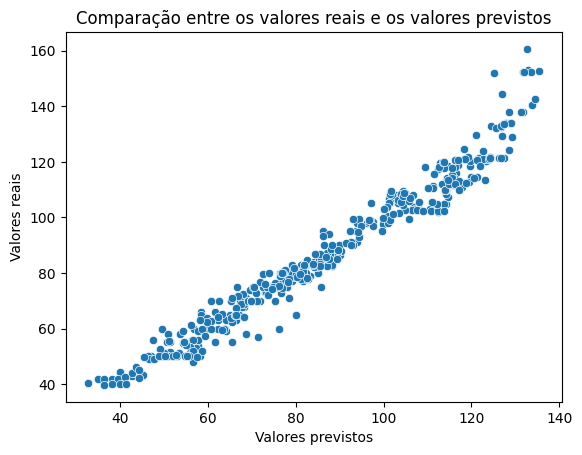

In [154]:
# Titulo do gráfico alinhado ao centro e com tamanho da fonte 14
plt.title('Comparação entre os valores reais e os valores previstos', loc='center', fontsize=12)

# Rótulo do eixo x
plt.xlabel('Valores previstos')

# Rótulo do eixo Y
plt.ylabel('Valores reais')

# Função que irá construir o grafico de pontos usando
# no eixo x as variáveis de previsão de texto e a variável de
# valores reais (armazenado na variável y_teste).
sns.scatterplot(x = previsao_peso, y = y_teste)

plt.show()

Conclusão da regressão linear: podemos observar pelo gráfico que os valores previstos
estão próximos dos valores reais, pois, como podemos observar, os pontos do gráfico
estão próximos o que indica uma diferença pequena entre previsão e valor real.

Agora vamos verificar o desempenho de previsão do nosso modelo de regressão linear usando algumas métricas de avaliação de desempenho como o Erro Médio Quadrado (MSE), o Erro Absoluto Médio (MAE) e o Coeficiente de Determinação (R2)

Erro Médio Quadrado: É uma métrica fundamental para avaliar o dsempenho de 
modelos de regressão, como a regressão linear. Ele quantifica a diferença média ao quadrado entre os valores previstos pelo modelo e os valores reais.


Interpretação do resultado do mse:

-> Quanto o menor o MSE, melhor o modelo: Um MSE baixo indica que as previsoes
do modelo estão mais próximas dos valores reais, o que é desejavel.

-> MSE = 0: Significa um modelo perfeito, nesse caso, as previsões de modelo
correspondem exatamente aos valores reais.

-> mse > 0: indica erros nas previsões, quanto maior o MSE, maiores são
os erros em média.

Considerações importantes:

-> Unidades do MSE: O MSE é expresso nas unidades da variável alvo quadrado. Por exemplo, se você estiver prevendo preços de casas em milhares de reais.
O MSE estará em milhares de reais ao quadrado.

-> Sensibilidade a outliers: O MSE é sensivel a outliers (valores discrepantes). Erros maiores têm um peso maior no cálculo do MSE
devido ao termo quadrado.

In [155]:
# Biblioteca que terá a função de cálculo de MSE
from sklearn.metrics import mean_squared_error

# Função do erro médio quadrado que irá receber
# 2 parametros: os valores reais e a previsão
# do modelo de regressão
mse = mean_squared_error(y_teste, previsao_peso)

print(f'Valor do erro médio quadrado: {mse}')


Valor do erro médio quadrado: 26.702041686349123


Conclusão do mse: O MSE de 26.96 kg² significa que, em média, os pesos previstos pelo nosso modelo desviam-se 5.19 kg (raiz quadrada de 26.96) dos pesos reais. 

-> Erro Absoluto Médio: é uma métrica útil para avaliar o desempenho de
modelos de regressão, como a regressão linear. Ele representa a média
da diferença absoluta entre os valores preditos pelo modelo e os valores
reais.

Intrepretação do MAE:

-> MAE = 0: Significa um modelo perfeito: Nesse caso, as previsões do modelo
correspondem exatamente aos valores reais.

-> MAE > 0: Indica erros nas previsões: Quanto maior o MAE, maiores são os erros em média.

In [156]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_teste, previsao_peso)

print(f'Valor do erro médio absoluto: {mae}')



Valor do erro médio absoluto: 3.654681703158147


conclusão do MAE: O mae de 3.66 significa que, em média, as previsões do seu modelo erram 3.67 kg para mais ou para menos.

Observação: Assim como no MSE, a avaliação do MAE depende da aplicação e da variação dos pesos na sua amostra. Em geral, o MAE é mais fácil de interpretar do que o MSE, pois está na mesma unidade de medida da variável que você está prevendo.

-> Coeficiente de Determinação: Também conhecido como R-quadrado, é uma métrica estatistica que avalia a qualidade do ajuste de um modelo de
regressão linear aos dados observados. Ele varia de 0 a 1, onde 1 indica
um ajuste perfeito e 0 indica que o modelo não explica nenhuma variabilidade dos dados.

In [157]:
from sklearn.metrics import r2_score


r2 = r2_score(y_teste, previsao_peso)

print(f'Valor do coeficiente de correlação: {r2}')

Valor do coeficiente de correlação: 0.9621307223531705


Conclusão do coeficiente de correlação: Um coeficiente de correlação de 0.96 indica uma correlação linear positiva muito forte entre os pesos previstos e os pesos reais.


Observação: Apesar dos valores relativamente altos nas 2 priemiras métricas, acredito que a regressão esteja no caminho certo, pois. após o ajustes de caracteristicas, podemos observar pelo gráfico scatterplot e pelo coeficiente de correlação que os valores previstos são próximos dos reais. Outro ponto a se observar é o fato das caracteristicas escolhidas terem total influencia com o peso do candidato.

Arvore de decisão: Construir uma arvore de decisão para classificar individuos em diferentes niveis de obesidade com base em suas caracteristicas.

Primeiro, vamos visualizar as colunas que serão utilizadas

In [158]:
base_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Genero                             2111 non-null   object 
 1   Idade                              2111 non-null   int64  
 2   Altura                             2111 non-null   float64
 3   Peso                               2111 non-null   float64
 4   Historico_Familiar                 2111 non-null   object 
 5   Frequencia_em_alimentos_caloricos  2111 non-null   object 
 6   Come_vegetais_nas_refeiçoes        2111 non-null   int64  
 7   Quant_refeiçoes_principais         2111 non-null   int64  
 8   Come_algo_entre_as_refeiçoes       2111 non-null   object 
 9   Fuma                               2111 non-null   object 
 10  Quant_agua_ingerida_diariamente    2111 non-null   float64
 11  Monitora_calorias_diariamente      2111 non-null   objec

Construção da árvore de decisão

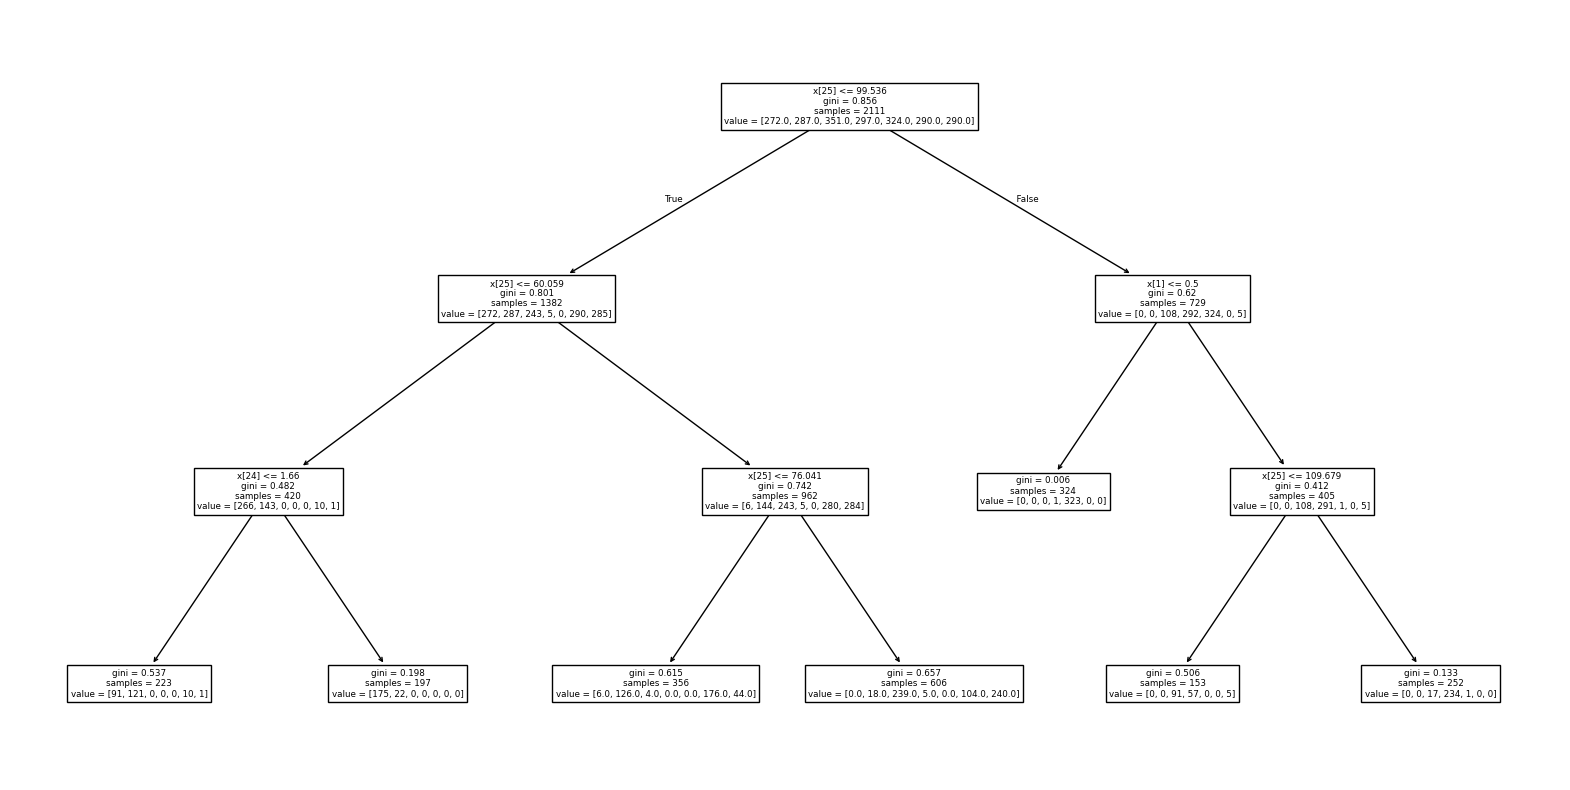

In [159]:
# Importa a classe que cria arvores de decisão
from sklearn import tree

# Importa a classe que transforma várias colunas categóricas
# em numéricas
from sklearn.preprocessing import OneHotEncoder

# importa a classe que transforma variáveis alvos categóricas
# em variáveis numéricas. 
from sklearn.preprocessing import LabelEncoder

# Instancia do objeto OneHotEncoder

# sparse_output = false: é eficiente para armazenar dados com muitos
# zeros. Ao definir o sparse como falso, você obtem uma matriz Numpy
# que pode ser mais fácil de trabalhar em alguns casos

# Handle_unknown = ignore: Lida com categorias desconhecidas que podem
# aparecer durante a transformação, mas que não estavam presentes durante
# o ajuste do codificador.
onehot_x = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Instancia do labelencoder que codifica variáveis alvo.
labelencoder = LabelEncoder()

# Ira definir o tamanho da imagem da arvore de decisão
plt.figure(figsize = (20, 10))

# Ira excluir das caracteristicas a variável alvo
colunas_categoricas = base_dados.drop('Nivel_Obesidade', axis = 1)

# Ira filtrar as colunas categóricas da base de dados. Precisamos filtrar
# as colunas para realizar a codificação.
caracteristicas_categoricas_decisao = colunas_categoricas.select_dtypes(include=[object])

# Irá filtrar as colunas numéricas da base de dados
caracteristicas_numericas_decisao = base_dados.select_dtypes(include=['number'])

# irá receber a variável alvo
variavel_alvo = base_dados['Nivel_Obesidade']

# Ira codfificar a variável alvo.
y_encoded = labelencoder.fit_transform(variavel_alvo)


# Aplicando o onehotencoder para transformas as colunas categóricas
# em números.
x_encoded = onehot_x.fit_transform(caracteristicas_categoricas_decisao)


# Ira possuir o novo nome das colunas após a codificação 
colunas_caracteristicas_one_hot = onehot_x.get_feature_names_out(input_features=caracteristicas_categoricas_decisao.columns)

# Ira criar um dataframe com as colunas categóricas codificadas.
x_encoded_df = pd.DataFrame(x_encoded, columns=colunas_caracteristicas_one_hot)

# Ira unir as colunas categóricas (dataframe com as colunas codificadas)
# com as colunas numéricas.

# reset_index: Redefine o indice do dataframe. Isso é útil quando o indice
# não está em uma sequência continua de inteiros.

# drop = true: Instrui o o pandas a descartar o indice antigo em vez de
# adiciona-lo como uma nova coluna. Isso é importante quando estamos
# concatenando dataframes, pois, assim, evitamos indices duplicados.

# axis = 1: especifica que a concatenação deve ocorrer ao longo das colunas (horizontalmente). Em outras palavras, os DataFrames serão unidos lado a lado. Se axis=0 fosse usado, a concatenação seria ao longo das linhas (verticalmente).
x = pd.concat([x_encoded_df, caracteristicas_numericas_decisao.reset_index(drop=True)], axis=1)

# Variável alvo
y = y_encoded

# Instância da arvore de decisão

# max_depth: Limita a profundidade máxima da árvore.

# min_samples_limit: Define o número minimo de amostras para
# dividir um nó interno

# min_samples_leaf: Define o número mínimo de amostras necessárias1 em um nó folha.   

# ccp_alpha: Parâmetro de poda que controla a complexidade da árvore.

arvore  = tree.DecisionTreeClassifier(max_depth=3, min_samples_split = 10, min_samples_leaf=5, ccp_alpha=0.01 )

# Treinamento da classificação dos valores na árvore.
arvore.fit(x, y)

# Construção do gráfico de arvore de decisão
tree.plot_tree(arvore)

# Exiição do gráfico
plt.show()

Antes de criar a análise da árvore de decisão, vamos verificar os numéricos que irão representar os niveis de obesidade

Primeiro vamos imprimir os valores originais da labelencoder (classe que irá codificar
as variáveis categóricas)

In [160]:
# Irá mostrar as classes categóricas da coluna
print('Categorias Originais: ', labelencoder.classes_)

Categorias Originais:  ['Insufficient_Weight' 'Normal_Weight' 'Obesity_Type_I' 'Obesity_Type_II'
 'Obesity_Type_III' 'Overweight_Level_I' 'Overweight_Level_II']


Agora, vamos verificar as posições criadas para cada nivel de obesidade

In [161]:
# kabelencoder: contém um array com as categorias únicas da variável
# alvo "Nivel de Obesidade".

# labelencoder.transform(labelencoder.classes_): Este trecho usa o método
# transform do labelencoder para converter as categorias originais (armazenadas em labelencoder.classes_) nos valores núméricos correspondentes
# que o labelencoder atribuiu a elas.

# zip(labelencoder.classes_, labelencoder.transform(labelencoder.classes_)):
# A função zip pega dois ou mais iteráveis (como listas ou arrays) e retorna
# um iterador de tuplas. Cada tupla contém um elemento de cada iterável de entrada.
# Neste caso, zip() combina com cada categoria original com o valor numérico
# correspondente.

# Dict: A função cria um dicionário a partir do iterador de tuplas. Neste caso
# as tuplas geradas por zip() são usadas para criar um dicionário onde:
# As categorias originais são chaves.
# Os valores numéricos são os valores correspondentes.

mapeamento_dos_valores = dict(zip(labelencoder.classes_, labelencoder.transform(labelencoder.classes_)))

print('Valores de cada categoria: ', mapeamento_dos_valores)

Valores de cada categoria:  {'Insufficient_Weight': np.int64(0), 'Normal_Weight': np.int64(1), 'Obesity_Type_I': np.int64(2), 'Obesity_Type_II': np.int64(3), 'Obesity_Type_III': np.int64(4), 'Overweight_Level_I': np.int64(5), 'Overweight_Level_II': np.int64(6)}


Verificando as variáveis das colunas de caracteristicas (através dela descobrimos que o peso é o primeiro parametro a ser análisado na arvore de decisão)

In [162]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 31 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Genero_Female                               2111 non-null   float64
 1   Genero_Male                                 2111 non-null   float64
 2   Historico_Familiar_no                       2111 non-null   float64
 3   Historico_Familiar_yes                      2111 non-null   float64
 4   Frequencia_em_alimentos_caloricos_no        2111 non-null   float64
 5   Frequencia_em_alimentos_caloricos_yes       2111 non-null   float64
 6   Come_algo_entre_as_refeiçoes_Always         2111 non-null   float64
 7   Come_algo_entre_as_refeiçoes_Frequently     2111 non-null   float64
 8   Come_algo_entre_as_refeiçoes_Sometimes      2111 non-null   float64
 9   Come_algo_entre_as_refeiçoes_no             2111 non-null   float64
 10  Fuma_no     

                       Conclusão da arvore de decisão

                       Indices dos niveis de obesidade

0: Peso insuficiente
1: Peso normal
2: Obesidade tipo 1
3: Obesidade do tipo 2
4: Obesidade do tipo 3
5: Sobrepeso nivel 1
6: Sobrepeso nivel 2
                       Definições dos valores da árvore:
x [indice da coluna]: Representa o indice da coluna de caracteristicas
que está sendo análisada.

Gini: representa a impureza do nó, ou seja, mostra a distribuição dos dados
em cada classe. Em termos mais simples, ele mede a probabilidade de uma
amostra ser classificada incorretamente se fosse rotulada aleatoriamente
de acordo com a distribuição da classe(niveis de obesidade) no nó.

Variação do gini:

0: Indica pureza total. Todas as amostras do nó pertencem a mesma classe.

1: Indica impureza máxima. As amostras estão igualmente distribuidas entre
todas as classes.

sample: indica o número total de amostras que estão sendo análisadas

value: mostra a quantidade de amostras de cada classe de obesidade no nó

                                 Resultados da árvore.

                                 Nó principal: Ira definir as condições que irão resultar em verdadeiro ou falso

X[25]: Irá verificar se o peso é menor ou igual a 99.53

gini: possui um gini de 0.856 o que significa que a distribuição de amostrar está bem distribuida entre as classes,
mas não estão igualmente distribuidas.

sample: No nó principal estamos utilizando todas as 2111 amostras presentes na base de dados.

Value: no nó principal temos: 272 pessoas (com peso insuficiente), 287 pessoas com pesos normais, 351 pessoas com obesidade do tipo 1, 297 pessoas com obesidade do tipo 2, 324 pessoas com obesidade do tipo 3, 290 pessoas com sobrepeso nivel 1 e 290 pessoas com sobrepeso nivel 2.


                                Nó da raiz verdadeira: se a condição  x[25] <= 99.53 for verdadeira
-> Se a condição for verdadeira, a arvore passará a fazer as seguintes verificações:

x[25]: irá verificar se o peso das pessoas que se encaixam na raiz verdadeira
é menor ou igual a 66.05

gini: A distribuição das amostras será menor (0.801), já que agora estaremos trabalhando
apenas com as pessoas que se encaixam na raiz verdadeira, mas, a distribuição ainda está
bem distribuida entre as classes, porém, não estão distribuidas igualmente.

sample: Na parte da raiz verdadeira estaremos trabalhando com 1382 amostras.

value: No nó da raiz verdadeira temos: 272 pessoas com peso insuficiente, 287 pessoas com o peso normal, 243 pessoas com obesidade do tipo 1, 5 pessoas com obesidade do tipo 2, nenhuma pessoa com obesidade do tipo 3, 290 pessoas com sobrepeso nivel, 285 pessoas com sobrepeso nivel 2.

-> Se a condição x[25] <= 66.05 for verdadeira ele fará as segunites verificações:

x[24]: Irá verificar se a altura das pessoas é menor ou igual a 1.66

gini: Nessa etapa, a distribuição já deixou de ser um pouco mais igualitária (0.482), isso também talvez ocorra por conta da diminuição de amostras, vamos observar essa diferença de na distribuição no value.

sample: Agora estaremos trabalhando com apenas 420 amostras (das pessoas que possuem o peso menor ou igual a 66.05).

value: nessa etapa teremos: 266 pessoas com peso insuficiente, 143 pessoas com peso normal, nenhuma com pessoa com obesidade do tipo 1, 2 e 3, 10 pessoas com sobrepeso nivel 1, 1 pessoa com sobrepeso nivel 2.

-> Se a condição x[24] <= 1.66 for verdadeira

gini: terá uma distribuição de amostras um pouco mais desbalanceada (0.537),
como poderemos observar no value.

sample: Agora estaremos atrapalhando com apenas 233 amostras

value: Nessa etapa teremos: 91 pessoas com peso insuficiente, 121 pessoas
com peso normal, nenhuma pessoa com obesidade do tipo 1, 2 e 3, 10 pessoas
com sobrepeso nivel 1 e 1 pessoa com sobrepeso nivel 2.

-> Se a condição x[24] <= 1.66 for falsa

gini: A distribuição das amostras também será bem desbalanceada (0.197)

sample: Agora a amostras terá apenas 197 valores.

value: nessa etapa teremos: 175 pessoas com peso insuficiente, 22 pessoas com peso normal e 0 nos demais niveis de peso



-> Se a condição x[25] <= 60.059 for falsa

x[25]: Irá verificar se o peso é menor ou igual a 76.041

gini: Terá uma distribuição razoavelmente balanceada 0.742

sample: irá trabalhar com 962 amostras, ou seja, a quantidade
de pessoas que se encaixam nessa condição.

value: nessa etapa teremos 6 pessoas com peso insuficiente, 144 pessoas com peso normal, 243 pessoas com obesidade do tipo 1, 5 pessoas com obesidade do tipo 2, nenhuma pessoa com obesidade do tipo 3, 280 pessoas com sobrepeso nivel 1, 284 pessoas com sobrepeso nivel 2.

Se a condição x[25] <= 76.041 for verdadeira:

gini: Teremos uma distribuição bem desbalanceada (0.615)

sample: iremos análisar 356 amostras

value: Nessa etapa teremos 6 pessoas com peso insuficiente, 126 pessoas com peso normal, 4 pessoas com obesidade do tipo 1, nenhuma pessoa com obesidade do tipo 1 e 2, 176 pessoas com sobrepeso nivel 1, 44 pessoas com sobrepeso nivel 2.

Se a Se a condição x[25] <= 76.041 for falsa:

gini: a distribuição estará bem desbalanceada (0.657)

sample: iremos trabalhar com 606 amostras

value: nessa etapa teremos nenhuma pessoa com peso insuficiente, 18 pessoas com peso normal, 239 pessoas com obesidade do tipo 1,  5 pessoas com obesidade do tipo 2, nenhuma pessoa com obesidade do tipo 3, 104 pessoas com sobrepeso nivel 1, 240 pessoas com sobrepeso nivel 2.


                                                         Nó da raiz verdadeira: se a condição  x[25] <= 99.53 for falsa

-> Se a condição for falsa, ou seja,  se o peso for maior que 99.53 ele irá:

x[1]: verificar se o sexo da pessoa (0 para feminino, 1 para masculino) é masculino ou feminino.

x[1] <= 0.5: individuo do sexo feminino.

x[1] > 0.5: individuo do sexo masculino.

gini: teremos uma distribuição bastante desbalanceada entre as classes (0.62)

sample: iremos trabalhar com 729 amostras

value: nessa etapa teremos 0 pessoas com peso insuficiente, 0 pessoas com peso normal, 108 pessoas com obesidade do tipo 1, 292 pessoas com obesidade do tipo 2, 324 pessoas com obesidade do tipo 3, nenhuma pessoa com sobrepeso nivel 1,
5 pessoas com sobrepeso nivel 2.





-> Se a condição x[1] <= 0.5 for verdadeira, ou seja, se o individuo for do sexo masculino:

gini: O gini estara extremamente desbalanceado.

sample: iremos trabalhar com 324 amostras

value: teremos apenas 1 pessoa com obesidade tipo 2 e 323 pessoas com obesidade
do tipo 3. Os demais niveis não possuem amostras.

-> Se a condição x[1] <= 0.5 for falsa, ou seja, se o individuo for do sexo Feminino:

x[25]: Ira verificar se o peso é menor ou igual a 109.679

gini: Teremos uma distribuição de amostras bem desbalanceada (0.412)

sample: iremos trabalhar com 405 amostras

value: nessa etapa teremos 0 pessoas com peso insuficiente, 0 pessoas com peso normal, 108 pessoas com obesidade do tipo 1, 291 pessoas com obesidade do tipo 2, 1 pessoa com obesidade do tipo 3, nenhuma pessoa com sobrepeso nivel 1, 5 pessoas com sobrepeso nivel 2.

-> Se a condição x[25] <= 109.679 for verdadeira:

gini: teremos uma distribuição razoavelemnte balanceada (0.506)

sample: trabalharemos com 153 amostras

value: nenhuma pessoa com peso insuficiente, nenhuma pessoa com peso normal, 91 pessoas com obesidade tipo 1, 57 pessoas com obesidade do tipo 2, nenhuma pessoa com obesidade do tipo 3, 0 pessoas com sobrepeso nivel 1, 0 pessoas com
sobrepeso nivel 2,

-> Se a condição x[25] <= 109.679 for falsa:

gini: teremos uma distribuição bem desequilibrada (0.133)

sample: iremos trabalhar com 252 amostras

value: Nessa etapa teremos 17 pessoas com obesidade do tipo 1, 234 pessoas com obesidade do tipo
2, 1 pessoa com obesidade do tipo 3. Os demais niveis não possuem amostras.

Resumindo, a árvore de decisão serve para mostrar quais são as métricas que irão ser consideradas no momento de classificar um novo dado.

Random Forest: Utilizar um modelo de florestas aleatórias para melhorar a precisão da classificação e entender a importância de cada variável preditora

Random Forest: É um método de aprendizado de máquina supervisionado amplamente utilizado para tarefas de classificação e regressão. Ele se baseia na criação de múltiplas árvores de decisão durante o treinamento e combina suas preisões 
para obter um resultado final mais preciso e robusto.

Como Funciona:

Criação da árvore de decisão: O algoritmo gera várias arvores de decisão, cada uma treinada em um subconjunto aleatório dos dados de treinamento.

Amostragem Aleatória: Para cada árvore, o Random Forest utiliza duas técnicas
de amostragem aleatória:

Bagging (Bootstrap Aggregating): Cada arvore é treinada em um subconjunto aleatório dos dados de treinamento, com reposição. Isso significa que algumas
amostras podem ser selecionadas várias vezes, enquanto outras podem não ser
selecionadas.

Seleção aleatória de atributos: Em cada nó da árvore, apenas um subconjunto aleatório dos atributos é considerado para determinar a melhor divisão

Votação ou média: Para tarefas de classificação, o Random Forest realiza uma votação entre as previsões de todas as arvores e seleciona a classe mais frequente. Para tarefas de regressão, ele calcula a média das previsões de 
todas as árvores.

Resultado final: O resultado final é a previsão combinada de todas as árvores, que geralmente é mais precisa e robusta do que a previsão de uma única árvore
de decisão.

Vantagens do random forest: 

Alta precisão: O random forest geralmente oferece alta precisão em uma variedade de tarefas de aprendizado de máquina.

Robustez: Ele é robusto a outliers e ruidos nos dados.

Redução de Overfitting: A combinação de várias árvores reduz o risco de overfitting, que é quando um modelo se ajusta muito bem aos dados de treinamento, mas tem desempenho ruim em dados novos. 

Importância de atributos: O Random Forest pode fornecer informações sobre a importância de cada atributo na previsão.

Versatilidade: Pode ser usado para tarefas de classificação e regressão.

Construção das florestas aleatórias

In [ ]:

# Biblioteca que permite dividir o conjunto de dados em treinamento e teste
# com o objetivo de treinar a previsão do algoritmo
from sklearn.model_selection import train_test_split

# Essa classe implememta o algoritmo Random Forest para tarefas de classificação
from sklearn.ensemble import RandomForestClassifier

# Essa função calcula a acurácia do modelo, que é a proporção de previsões
# corretas.

# Acurácia: Em termos simples, a acurácia de um algoritmo de previsão se 
# refere á capacidade desse algoritmo de fazer previsões corretas. É uma
# medida de quão bem o modelo preditivo se alinha com os resultados reais.
# No entanto, é importante entender que a acurácia pode ser interpretada
# de maneiras diferentes dependendo do contexto.
from sklearn.metrics import accuracy_score, classification_report

# Os mesmos valores utilizados na construção da arvore de decisão.
caracteristicas_arvores = x

# O mesmo alvo da árvore de decisão (nivel de Obesidade).
alvo_arvore = y

# Ira dividir os dados em teste e treino 
# x_train: As caracteristicas  das arvores usadas para treinar o modelo.
# x_test: As caracteristicas das arvores usadas para testar o modelo.
# y_train: Os rótulos ou valores alvo correspondentes a x_train, usados
# para treinar o modelo.
# y_test: Os rótulos ou valores alvo correspondentes a x_test, usados
# para avaliar o desempenho do modelo.

# test_size: Significa que 30% dos dados serão usados para teste e os 
# demais (70%) serão usados para treinamento.

# random state: É usado para controlar o gerador de números aleatórios.
# Definir um valor especifico random state "semeia" o gerador de números
# aleatórios, o que garante que a mesma sequência de números aleatórios
# seja produzida toda vez que o código for executado. Isso significa que
# se você usar o mesmo random, você ira obter a mesma divisão de teste todas
# as vezes.
x_train, x_test, y_train, y_test = train_test_split(caracteristicas_arvores, alvo_arvore, test_size=0.3, random_state=42)

# Instância da classe que cria florestas aleatórias
# n_estimators: Ira definir a quantidade de arvores que a floresta irá
# conter.
# random state: Irá controlar a aleatoriedade da floresta
floresta = RandomForestClassifier(n_estimators=100, random_state=42)

# Ira treinar o algoritmo para construção da floresta. 
# Dessa maneira o algoritmo irá aprender a relação entre
# as caracteristicas (x_train) e o nivel de obesidade(y_train).
floresta.fit(x_train, y_train)

# Irá construir a floresta.
previsao_florestas = arvore.predict(x_test)

# Irá calcular a acurácia do modelo (capacidade da previsão do modelo),
# comparando os valores previstos (previsao_floresta) com os valores 
# reais (y_test)
acuracia = accuracy_score(y_test, previsao_florestas)

# Ira possibilitar que a floresta mostre a porcentagem de importância de 
# cada caracteristica análisada.
caracteristicas_importantes = floresta.feature_importances_

# Vamos criar um dataframe para visualizarmos melhor os rótulos e a porentagem de relevância das caracteristicas
# vamos atribuir a primeira coluna os nomes das caracteristicas análisadas, depois vamos atribuir a segunda 
# coluna as porcentagens de relevância de cada caracteristicas
importantes_df = pd.DataFrame({'Caracteristica':caracteristicas_arvores.columns, 'Importancia':caracteristicas_importantes})

# Agora vamos ordenar os valores do dataframe em ordem decrescente, para isso
# vamos passar para o metodo sort_values o nome da coluna que queremos ordenar
# e o valor false para o ascending que irá ordenar os valores em ordem decrescente.
importantes_df = importantes_df.sort_values('Importancia', ascending=False)

# Impressão do dataframe
print(importantes_df)

print(f'Acurácia: {acuracia}' )

# Imprime um relatório detalhado das métricas de classificação, que
# fornece informações mais detalhadas sobre o desempenho do modelo
# para cada classe de nivel de obesidade
print(classification_report(y_test, previsao_florestas))




                                Caracteristica  Importancia
25                                        Peso     0.287866
24                                      Altura     0.090522
23                                       Idade     0.088670
26                 Come_vegetais_nas_refeiçoes     0.058118
28             Quant_agua_ingerida_diariamente     0.057745
30           Tempo_em_dispositivos_eletronicos     0.053524
0                                Genero_Female     0.040182
1                                  Genero_Male     0.039935
27                  Quant_refeiçoes_principais     0.033030
29              Frequencia_de_atividade_fisica     0.030687
16      Frequencia_que_ingere_alcool_Sometimes     0.025970
3                       Historico_Familiar_yes     0.024127
8       Come_algo_entre_as_refeiçoes_Sometimes     0.022955
2                        Historico_Familiar_no     0.021540
17             Frequencia_que_ingere_alcool_no     0.019119
18             Transporte_utilizado_Auto

                               Importância das caracteristicas
-> Podemos observar que as principais caracteristicas que o algoritmo análisa 
na hora de classificar os niveis são: peso (28% de relevância na decisão),altura (9% de relevância na decisão) e idade (8% de relevância na decisão).

-> Ja as caracteristicas menos relevantes são o uso de bicicletas e motos e o
consumo de álcool (todas com 0% de relevância na decisão)

Mapeando novamente a variável y para verificar o indice de cada nivel de obesidade

In [164]:
mapeamento_dos_valores

{'Insufficient_Weight': np.int64(0),
 'Normal_Weight': np.int64(1),
 'Obesity_Type_I': np.int64(2),
 'Obesity_Type_II': np.int64(3),
 'Obesity_Type_III': np.int64(4),
 'Overweight_Level_I': np.int64(5),
 'Overweight_Level_II': np.int64(6)}

                                Conclusão das florestas aleatórias.
                                 

Acurácia: Representa a proporção de previsões corretas do modelo em relação ao total de previsões.

precision: Mede a proporção de previsões positivas corretas em relação a todas as previsões positivas feitas pelo modelo. Em outras palavras, de todas as vezes que o modelo previu que um exemplo pertencia a uma classe, qual porcentagem de vezes que ele estava correto?

Recall: A revocação mede a proporção de exemplos positivos que foram corretamente identificados pelo modelo. Em outras palavras, de todos 
os exemplos que realmente pertencem a uma classe. 

f1-score: A pontuação f1 é uma média harmônica entre precisão e revocação.
Ela fornece um equilibrio entre essas duas métricas.

support: O suporte é o número de exemplos reais que pertencem a cada classe
no conjunto de teste.

macro avg: Calcula a média das métricas (precisão, revocação, f1-score) sem levar em consideração o tamanho da cada classe.

weighted avg: Calcula a média das métricas levando em consideração o tamanho de cada classe.

                          Análise dos valores da floresta

                               Acurácia:
 A árvore possui uma acurácia de 63%, o que significa que 63%
dos valores previstos pela floresta estão corretos.

                              precision
Nessa etapa vamos verificar a porcentagem de acertos da floresta em cada nivel de obesidade.

peso insuficiente: 84% das arvores da floresta previram corretamente os valores
da classe de  peso insuficiente.

peso normal: 51% das árvores previram corretamente os valores da classe de
peso normal.

Obesidade do tipo 1: 54% das arvores da floresta previram corretamente os valores da classe de obesidade do tipo 1

Obesidade do tipo 2: 91% das arvores da floresta previram corretamente os
valores da classe de obesidade do tipo 2.

Obesidade do tipo 3: todas as arvores da floresta (100%) previram corretamente 
os valores da classe de obesidade do tipo 3.

sobrepeso nivel 1: 49% das arvores da floresta previram corretamente os valores da classe de sobrepeso nivel 1.

sobrepeso nivel 2: 39% das arvores da floresta previram corretamente os
valores da classe de sobrepeso nivel 2.

                            
                               Recall
proporção de valores que realmente pertencem a uma classe.

Peso insuficiente: Das pessoas que realmente pertencem ao nivel de peso insuficiente, o algoritmo identificou 60% das instâncias (pessoas).

Peso normal: Das pessoas que realmente pertencem ao nivel de peso normal,
o algoritmo identificou 40% das instâncias (pessoas)

Obesidade do tipo 1: Das pessoas que realmente pertencem ao nivel de
obesidade do tipo 1, o algoritmo identificou 25% das instâncias (pessoas)

Obesidade do tipo 2: Das pessoas que realmente pertencem ao nivel de
obesidade do tipo 2, o algoritmo identificou 76% das instâncias (pessoas).

Obesidade do tipo 3: Das pessoas que realmente pertencem ao nivel de obesidade 
do tipo 3, o algoritmo identificou 99% das instâncias (pessoas)

sobrepeso nivel 1: Das pessoas que realmente pertencem ao nivel de sobrepeso nivel 1, o algoritmo identificou 65% das instâncias (pessoas).

Sobrepeso nivel 2: Das pessoas que realmente pertencem ao nivel de sobrepeso nivel 2, o algoritmo identficou 81% das instâncias (pessoas).

                              
                                 F1
Irá avaliar o desempenho de identificação de instâncias e da previsão dos valores reais baseado na precision e no recall 

peso insuficiente:o algoritmo obteve 70% de precisão na identificação de instâncias(pessoas) e previsões de valores da classe de peso insuficiente.
Esse valor é relativamente alto e indica um bom desempenho do algoritmo
nas previsões dessa classe.

peso normal: O algoritmo obteve 45% de precisão na identificação de instâncias 
e previsões de valores da classe de peso normal. Esse valor é relativamente baixo e inidica um desempenho ruim do algoritmo nas previsões dessa classe.

Obesidade do tipo 1: O algoritmo obteve 35% de precisão na identificação de 
instâncias e previsões de valores da classe de obesidade do tipo 1. Esse valor baixo representa um desempenho ruim do algoritmo nas previsões dessa classe.

Obesidade do tipo 2: O algoritmo obteve 83% de precisão na identificação de
instâncias e previsões de valores da classe de obesidade do tipo 2. Esse valor baixo representa um bom desempenho do algoritmo nas previsões dessa classe.

Obesidade do tipo 3: O algoritmo obteve 99% de precisão na identificação de instâncias e previsões de valores da classe obesidade do tipo 3. Esse valor alto representa um ótimo desempenho do algoritmo nas previsões dessa classe.

Sobrepeso nivel 1: O algoritmo obteve 56% de precisão na identificação de
instâncias e previsões de valores da classe sobrepeso nivel 1. Esse valor
representa um desempenho mediano nas previsões dessa classe.

Sobrepeso nivel 2: O algoritmo obteve 52% de precisão na identificação de
instâncias e previsões de valores da classe sobrepeso nivel 2. Esse valor
representa um desempenho mediano nas previsões dessa classe.


                                      Support
Irá representar a quantidade real de amostras em cada classe (nivel de obesidade) do conjunto de teste.

peso insuficiente: possui 86 amostras.

peso normal: possui 93 amostras.

Obesidade do tipo 1: possui 102 amostras

Obesidade do tipo 2: possui 88 amostras

Obesidade do tipo 3: possui 98 amostras.

sobrepeso nivel 1: possui 88 amostras.

sobrepeso nivel 2: possui 79 amostras.




                                     Macro avg 
Irá demonstrar o desempenho total da precision, do recall e do f1 score

precision: Possui 67% de eficiência nas previsões de forma geral.

recall: possui 64% de eficiência na identificação geral de instâncias das 
classes.

f1: possui 63% de eficiencia na identificação de instâncias e previsões 
de valores de forma geral.

                                  weight avg
possui a mesma função que o macro avg, porém ele dá mais peso as classes que
possuem mais amostras, basicamente ele faz um média ponderada do precision, recall e f1.

precision: possui 67% de eficiência nas previsões de forma geral

recall: Possui 63% de eficiência nas identificações de instâncias e previsões de valores de forma geral

f1: Possui 63% de eficiência nas identificações de instâncias e previsões de valores de forma geral.

                                Conclusões gerais
-> O algoritmo preveu corretamente todos os valores da classe obesidade do tipo 3. Esse resultado provavelmente contribuiu significativamente na alta
taxa de identificação de instâncias da classe (99%)

-> A classe que o algoritmo mais teve dificuldades de prever foi a de 
sobrepeso nivel 2 (que teve apenas 39% das arvores que conseguiram prever corretamente os valores), entretanto, o algoritmo foi bastante eficiente
na identificação de instâncias da classe.

-> De forma geral as quantidades de amostras estão bem distribuidas entre as classes.

